SARIMA and Prophet for Apple Stock Price Forecasting

Predicting stock prices plays a crucial role in the financial world, enabling investors to make informed decisions. The complex dynamics of stock market data have been captured by various forecasting models in recent years. For time series forecasting, Seasonal ARIMA and Facebook's Prophet are two prominent models. This study analyzes these models comprehensively, focusing specifically on predicting Apple Inc. stock prices. It is AAPL. In this report, we evaluate the performance of both models, compare their strengths and weaknesses, and provide actionable insights for investment decisions.

Preparing the data, splitting it into training and test sets, and applying the appropriate models is the first step in our analysis. We implement the Seasonal ARIMA model with optimized parameters, taking into account the seasonality and trend of the AAPL stock price. Based on residual analysis, diagnostic plots, and statistical tests, we evaluate the model's accuracy and diagnose its performance. Similarly, we employ Facebook's Prophet, a flexible and user-friendly forecasting tool, to capture the underlying trends and patterns in the data. We discover key insights from our analysis. The seasonal ARIMA model provides robust predictions of AAPL stock prices, capturing seasonality and abrupt changes. Prophet, on the other hand, demonstrates simplicity and efficiency in implementation, making it accessible even to users with limited statistical knowledge. We observe, however, that Prophet is prone to overfitting, resulting in less accurate predictions, especially when capturing seasonality.

Library imports and installations


In [26]:
##Installing
%%capture
!pip install fbprophet
!pip install -U statsmodels
!pip install colorama

Using the provided code, three Python packages are installed: fbprophet, statsmodels, and colorada. These packages are used for various data analysis and forecasting tasks. Facebook's prophet package is used for time series forecasting. It is designed to handle time series data with multiple seasonality and provides an easy-to-use interface for building forecasting models. StatisticsModels is a Python package for statistical modeling. It offers a wide range of statistical models and tools for various types of data analysis, including regression, time series analysis, and hypothesis testing. Its colorado module simplifies printing colored text. Printing colored output is supported across platforms, allowing you to highlight important information or add visual cues to the text.

By installing these packages, the code ensures that the necessary dependencies are available for any subsequent analysis or forecasting tasks that may be performed.

In [41]:
##Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

The provided code imports various Python packages that are commonly used for data analysis, visualization, statistical modeling, and forecasting tasks. For example, the pandas package is a powerful tool for manipulating and analyzing data. It provides data structures and functions to efficiently handle and analyze structured data, such as tables or data frames. Numpy is a fundamental Python package for scientific computing. It provides support for large, multi-dimensional arrays and a collection of mathematical functions to operate on these arrays. Pyplot is a Python plotting library. It provides a flexible and comprehensive set of functions for creating static, animated, and interactive visualizations in Python. It is based on the matplotlib library. It provides a high-level interface for drawing informative and attractive statistical graphics.

The `statsmodels` package, as mentioned earlier, is a comprehensive statistical modeling library that includes a wide range of statistical models and tools.

The `scipy` package is a library for scientific computing and technical computing. It provides functions for mathematical and scientific operations, including statistical functions and optimization algorithms.

The `fbprophet` package, also mentioned earlier, is a time series forecasting library developed by Facebook.

The `IPython.display` module provides a set of functions to control the display of objects in the IPython environment. It is particularly useful for displaying visualizations or controlling the output format of certain objects. Operating systems can be accessed via the OS module. There are functions for file and directory operations, such as navigating directories, creating and deleting files, and executing system commands. There are functions for regular expressions. It provides support for pattern matching and text manipulation using regular expressions.

The `colorama` package, mentioned earlier, is a library that simplifies printing colored text on the command line.

The `plotly.express` module is a high-level interface for creating interactive visualizations using the Plotly library.

The `warnings` module provides functions to control warnings in Python. It allows users to ignore or handle warning messages.

Finally, the `matplotlib.patches` module provides classes for creating various types of graphical patches, such as rectangles, circles, and polygons, which can be used for customizing plots.

By importing these packages, the code ensures that the necessary functions, classes, and tools are available for performing data analysis, visualization, and forecasting tasks in subsequent code sections.

In [70]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

The provided code modifies certain parameters of the Matplotlib library, which is used for creating plots and visualizations in Python. In this module, tick locators and formatters are controlled. It allows for fine-grained control over the appearance and labeling of tick marks on axes. It sets three Matplotlib parameters. Axis labels in plots are defined by the 'axes.labelsize' parameter. The `'xtick.labelsize'` parameter determines the font size of the tick labels on the x-axis, and the `'ytick.labelsize'` parameter determines the font size of the tick labels on the y-axis.

By modifying these parameters, the code ensures that the axis labels and tick labels in subsequent plots created with Matplotlib will have a specific font size.

The `plt.style.context('fivethirtyeight')` line sets the style of the plot to the "fivethirtyeight" style. Matplotlib provides a variety of predefined styles that can be used to change the appearance of plots, and the "fivethirtyeight" style mimics the plots often seen on the website FiveThirtyEight, a data-driven journalism publication. As long as the style is set to "fivethirtyeight", the plots will have a consistent visual style matching the FiveThirtyEight website.

# Loading Data (Source: Yahoo Finance)

In [5]:
data = pd.read_csv('GitHub Projects/Time Series /Orignal DataSet/AAPL.csv')

This code reads a CSV file named 'AAPL.csv' and stores its contents in a variable called `data`. 

Data is read from a CSV (Comma-Separated Values) file using the pandas library's read_csv() function. In this case, the file 'AAPL.csv' is being read. Its location is specified by the file path 'GitHub Projects/Time Series /Orignal DataSet/AAPL.csv'. As a result of the system's directory structure and file location, the path to the file may vary. After reading the file, the data is stored in a pandas DataFrame, a two-dimensional labeled data structure with columns of potential different types of data. The DataFrame allows for easy manipulation and analysis of the data. In subsequent code sections, the data is made accessible by assigning the result of pd.read_csv() to a variable called data.

In [7]:
data.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

The provided code calls the `head()` function on the `data` DataFrame, displaying the first few rows of the data.

The `head()` function is a method available in pandas DataFrames that returns a new DataFrame containing the first n rows of the original DataFrame, where n is typically set to 5 by default.

By calling `data.head()`, the code prints the first five rows of the `data` DataFrame to the output. Each row represents a data entry, and each column represents a different attribute or variable of the data. It is common in data analysis to display the dataset's head to get a quick overview. The user can examine the data's structure and format, check for any missing values or anomalies, and gain an initial understanding of the dataset.

Data Description: This dataset contains information about a security's trading activity. It includes the following attributes:  Date: The date of the trading activity. Open: The price at which the security first trades on that day. High: The highest price reached during the trading day. Low: The lowest price reached during the trading day. Close: The price at which the stock last traded during the trading day. Adjusted Close: The adjusted closing price, which is based on corporate actions or events that may affect the closing price. Volume: The number of shares traded. During the trading day, these attributes provide information about price movement and trading volume of the security. Market trends, volatility, and liquidity can be analyzed with them. Data from the dataset can be used to conduct various types of financial analysis and modeling, including technical analysis, forecasting, and risk assessment.

In [ ]:
##Summary Statistics
data.describe()

Open         High  ...    Adj Close        Volume
count  2011.000000  2011.000000  ...  2011.000000  2.011000e+03
mean    126.707469   127.827594  ...   119.505548  5.949670e+07
std      50.483753    50.926301  ...    52.438444  4.683856e+07
min      55.424286    57.085712  ...    48.921928  1.136200e+07
25%      85.882858    86.717858  ...    75.056679  2.758565e+07
50%     113.050003   114.190002  ...   105.222908  4.346900e+07
75%     165.190002   167.409996  ...   160.047111  7.471030e+07
max     291.119995   293.970001  ...   289.522614  3.765300e+08

[8 rows x 6 columns]

The provided code calls the `describe()` function on the `data` DataFrame, which computes summary statistics for each numerical column in the dataset.  The `describe()` function is a method available in pandas DataFrames that generates descriptive statistics of the data, such as count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value.  By calling `data.describe()`, the code calculates and displays these summary DataFrame statistics for each numerical column. This provides a quick overview of the central tendency, dispersion, and shape of the distribution of the numeric variables in the dataset. The count statistic represents the percentage of non-null values in each column. The mean represents the average value of each column, while the standard deviation measures the spread or variability of the data around the mean.

Each column's minimum and maximum values show how the data is distributed, and the quartiles (Q1, Q2, Q3) describe how the data is distributed. The median (Q2) represents the middle value of the sorted data, separating the lower half from the upper half. The summary statistics provide insight into the distribution, variability, and overall characteristics of the data. Data quality can be assessed, potential issues or anomalies detected, and initial assessments or comparisons between variables can be made.

In [ ]:
##Exploring Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


The provided code calls the `info()` function on the `data` DataFrame, which provides a concise summary of the dataset's information.

The `info()` function is a method available in pandas DataFrames that displays important details about the DataFrame, including the number of rows, the number of columns, the data types of the columns, and the amount of memory used by the DataFrame.

By calling `data.info()`, the code prints this summary information to the output. It provides an overview of the dataset's structure and allows for a quick assessment of the data's completeness and quality. It also includes the number of rows in the DataFrame. It also displays the number of columns, which indicates the number of variables or attributes in the dataset. Data types of columns are particularly useful as they reveal the nature of each variable. Typically, it indicates whether a column contains numeric data (integers or floats), textual data (strings), or datetime values. In addition, memory usage information is useful for optimizing memory usage and improving computational efficiency in large datasets, as the data frame consumes a considerable amount of memory. It is a useful tool for exploring and understanding datasets because it provides a concise overview of the dataset's structure. Before performing any analysis or manipulation.

Preprocessing of data

In [8]:
##Converting Date to DateTime Object
data['Date']

0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
2006    2019-12-23
2007    2019-12-24
2008    2019-12-26
2009    2019-12-27
2010    2019-12-30
Name: Date, Length: 2011, dtype: object

The provided code accesses the 'Date' column in the `data` DataFrame and performs a conversion operation. The 'Date' column in the DataFrame likely contains date values in a particular format. The purpose of this code is to convert the data in the 'Date' column to a DateTime object. DateTime objects are commonly used to represent dates and times. It allows for easier manipulation, comparison, and analysis of date and time-related data. Using this code, existing values in the 'Date' column are transformed into DateTime objects. As a result of this conversion, you can sort the data chronologically, extract specific time periods, or calculate time-based values. As a result of the conversion, the 'Date' column will contain DateTime objects rather than the original format, making handling and analyzing date values easier in the future.

In [9]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

The provided code modifies the 'Date' column in the `data` DataFrame by converting its values from their current format to a standardized date format using the `pd.to_datetime()` function.

The `pd.to_datetime()` function is a method provided by the pandas library that is used to convert a given input into a DateTime format. In this case, the 'Date' column is passed as the input to this function. format="%Y-%m-%d"" specifies the format of the original dates in the 'Date' column. The format '%Y-%m-%d' represents the year, month, and day in a specific order, separated by hyphens. This code assigns converted DateTime objects to the 'Date' column. This conversion ensures that the 'Date' column values are uniformly represented as dates in the 'YYYY-MM-DD' format, regardless of the original format of the dates in the column.

A standardized DateTime format makes manipulating, sorting, and analyzing date values easier. With it, you can filter data within specific date ranges, extract components of the date (year, month, day), and perform time series analysis or forecasting.

In [10]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

The provided code retrieves the data types of each column in the `data` DataFrame. Pandas uses the dtypes attribute to access columns' data types. By calling `data.dtypes`, the code returns a series that contains the data type of each column in the DataFrame. These types describe the values stored in each column. A column's data type might be 'int64' for integers, 'float64' for floating-point numbers, 'object' for strings or mixed data types, or 'datetime64' for dates and times. Understanding the structure and content of the dataset requires knowing the data types of the columns. It provides information about the types of variables or attributes in the dataset and allows for appropriate data handling and analysis.

Different data types behave differently and require different handling, which makes it necessary to know the data types before performing specific operations or calculations on them. Additionally, it identifies any inconsistencies or unexpected data types in the dataset that may need further investigation.

In [11]:
##Making Date as Index 
data.set_index('Date',inplace=True)

The provided code modifies the `data` DataFrame by setting the 'Date' column as the new index of the DataFrame. DataFrame indexes are changed using pandas' set_index() function. In this case, the 'Date' column is specified as the new index for the DataFrame. This code updates the DataFrame's index, and the 'Date' column is no longer treated as a regular column. This becomes an index, which is a special label assigned to each row in the DataFrame. As a result of its efficiency and convenience, setting the 'Date' column as the index is common when working with time series data. As the index for the 'Date' column, time-based operations become easier, such as indexing and slicing data based on specific dates or time periods, resampling the data at different frequencies, and performing time series modeling or forecasting.  The `inplace=True` parameter ensures that the modification is made directly on the `data` DataFrame itself, rather than creating a new DataFrame with the updated index.  By making the 'Date' column the index, the code organizes the data in a way that facilitates time-oriented analysis and allows for more straightforward manipulation and exploration of the time series dataset.

In [12]:
data['Date'] = data.index

The provided code assigns the index of the `data` DataFrame to a new column named 'Date'.  In this code, `data.index` refers to the index of the DataFrame, which is typically a sequence of labels or values that uniquely identify each row in the DataFrame.  By assigning `data.index` to `data['Date']`, the code creates a new column called 'Date' in the DataFrame and populates it with the values from the DataFrame's index.  The purpose of this code may vary depending on the specific use case, but a It is common for this to be done in order to convert an index into a regular column of data, which can be analyzed or visualized further.  By adding the index values as a new column, the code makes it easier to access and manipulate the index values as regular data within the DataFrame. Particularly useful when performing calculations or transformations that require index values to be treated as regular data.

In [13]:
data.head()

Open       High        Low  ...  Adj Close    Volume       Date
Date                                         ...                                
2012-01-03  58.485714  58.928570  58.428570  ...  50.765709  75555200 2012-01-03
2012-01-04  58.571430  59.240002  58.468571  ...  51.038536  65005500 2012-01-04
2012-01-05  59.278572  59.792858  58.952858  ...  51.605175  67817400 2012-01-05
2012-01-06  59.967144  60.392857  59.888573  ...  52.144630  79573200 2012-01-06
2012-01-09  60.785713  61.107143  60.192856  ...  52.061932  98506100 2012-01-09

[5 rows x 7 columns]

The provided code retrieves the first few rows of the `data` DataFrame and displays them.

The `head()` function is a method available in pandas DataFrames that returns a new DataFrame containing the first n rows of the original DataFrame, with n typically set to 5 by default.

By calling `data.head()`, the code prints the first five rows of the `data` DataFrame to the output. Each row represents a data entry, and each column represents a different attribute or variable of the data. DataFrame heads are often shown to provide a quick overview of the dataset. Users can use it to look at the data structure and format, check for missing values, and gain an overview of its contents.

By displaying the first few rows of the DataFrame, the code provides a glimpse into the data's structure and helps in understanding the overall format and organization of the dataset.

In [14]:
##Checking Null Values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

The provided code checks for null values in each column of the `data` DataFrame and returns the sum of null values for each column. This is done by using the null() method available in Pandas DataFrames. It returns a DataFrame of the same shape, where each cell contains either True or False depending on whether the corresponding value is null.

By calling `data.isnull()`, the code generates a DataFrame of the same shape as `data` but with boolean values indicating the presence of null values in each cell.

The `sum()` function is then applied to this DataFrame, which calculates the sum of True values (1) along each column. This effectively counts the number of null values in each column. The code emits a series that displays the total number of null values in each column. Each column name is associated with its respective count of null values. Missing data can negatively impact the validity and reliability of an analysis. Null values can be identified and distributed to help make informed decisions about how to deal with them, such as imputing missing values, excluding affected observations, or using alternative analysis methods. The output of this code provides a quick overview of the presence and extent of missing values in each column, which can be used for further data cleaning or preprocessing steps to ensure the accuracy and quality of the dataset.

In [ ]:
Visualising

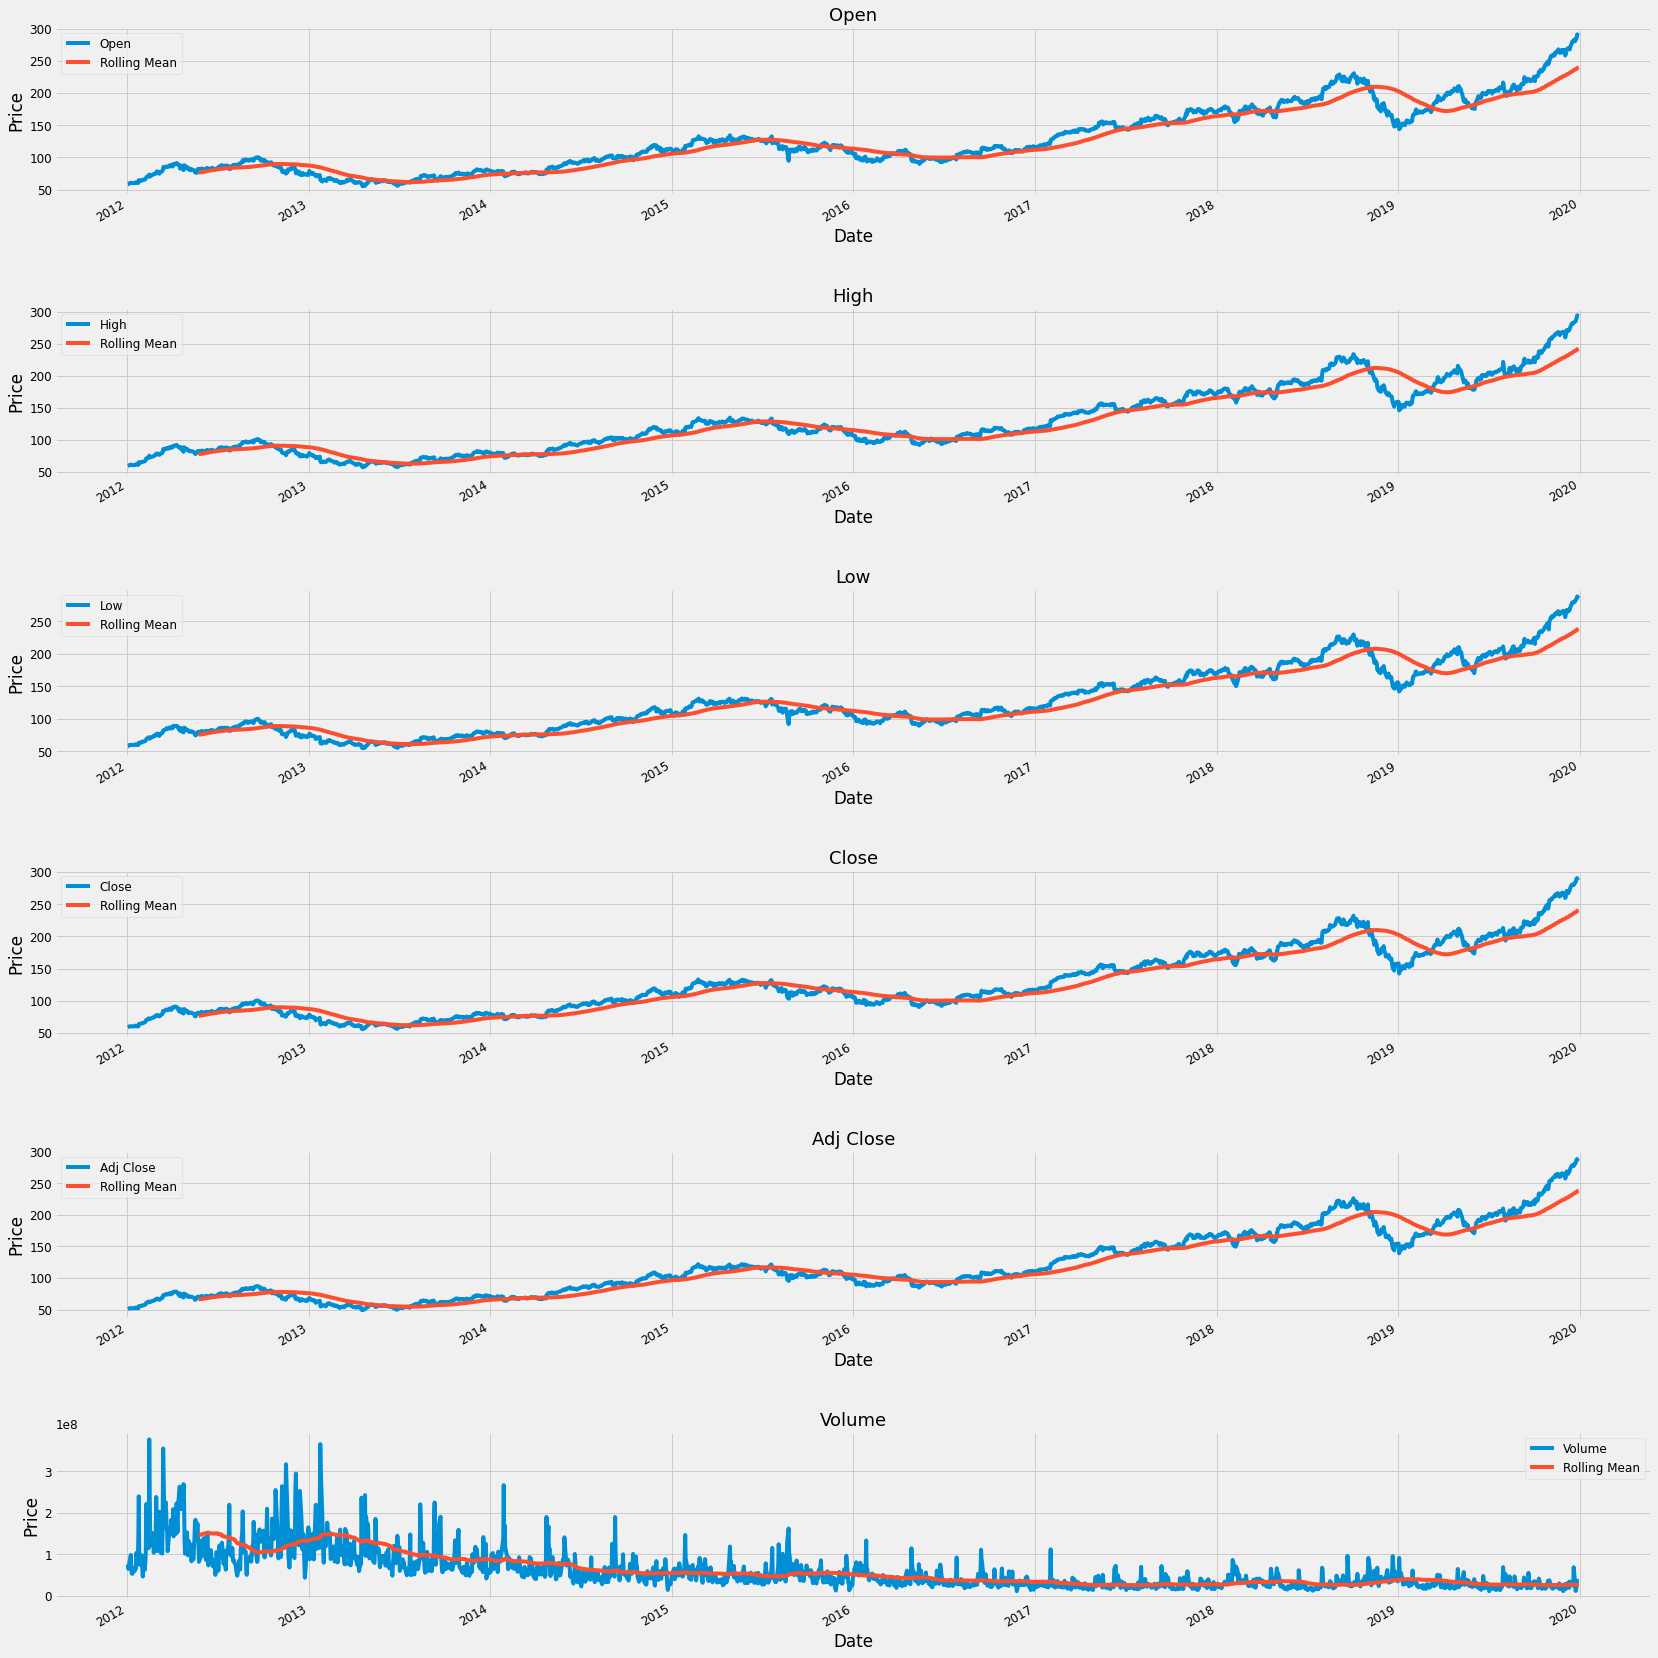

In [ ]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

The provided code generates a multi-line plot for the first six columns of the `data` DataFrame.  The `col_names = data.columns` line assigns the column names of the DataFrame to the `col_names` variable.  The `fig = plt.figure(figsize=(24, 24))` line creates a new figure object with a specific size of 24x24 inches, which will be used as the canvas for the plot.  A `for` loop is then used to iterate over the range from 0 to 5 (inclusive), corresponding to the first six columns of the DataFrame. Within each iteration, the code creates a new subplot (`ax = fig.add_subplot(6, 1, i+1)`) within the figure, resulting in a vertical arrangement of six subplots.  For each subplot, the code plots the values of the corresponding column (`data.iloc[:, i]`) against the date. It also adds a rolling mean line plot for the same column using `data.iloc[:, i].rolling(100).mean()`.  The code sets the title of each subplot (`ax.set_title(col_names[i], fontsize=18)`) to the corresponding column name, and sets the labels for the x-axis and y-axis (`ax.set_xlabel('Date')` and `ax.set_ylabel('Price')`, respectively).  Styling and visual elements are applied to each subplot, including setting the edge color of the subplot to black (`ax.patch.set_edgecolor('black')`), applying the 'fivethirtyeight' style (`plt.style.context('fivethirtyeight')`), and adding a legend (`plt.legend(prop={'size': 12})`).  After the loop, the `fig.tight_layout(pad=3.0)` line adjusts the spacing between the subplots to avoid overlapping.  Finally, `plt.show()` is called to display the generated plot on the screen.  In summary, this code creates a multi-line plot with six subplots, each representing one of the first six columns of the `data` DataFrame. For comparison, the plot shows the price data over time for each column and includes a rolling mean line plot.

Feature Selection. We can eliminate features like Open,Low, High Close automatically as they are high multicollinear with Adj Close . Adj Close accounts for all corporate decisions, such as stock splits and dividends.

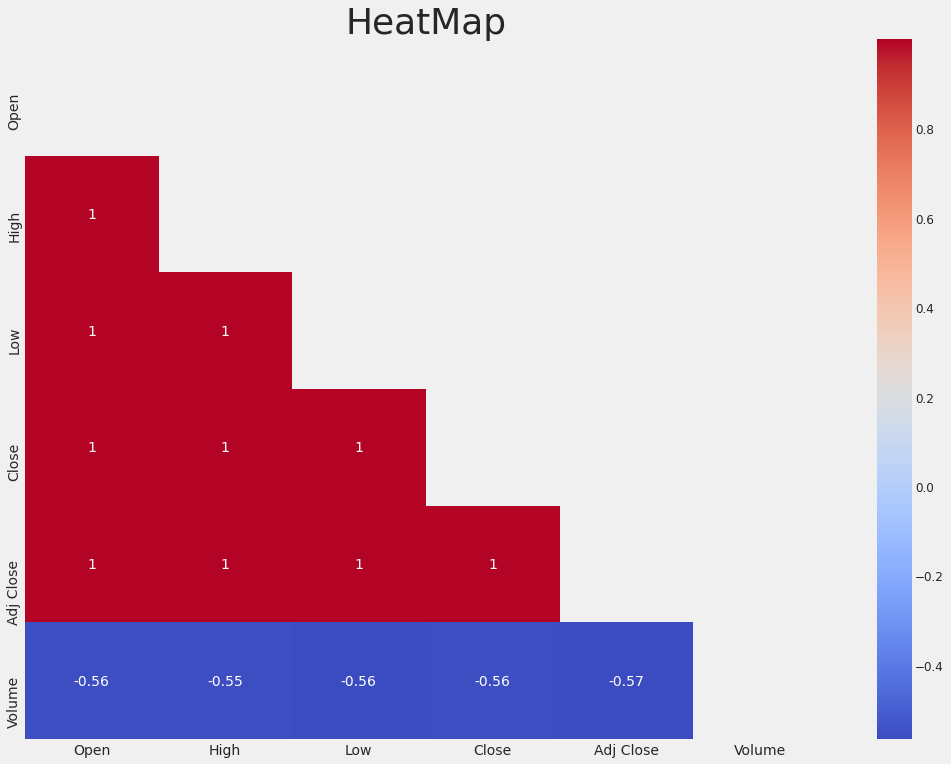

In [ ]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

The provided code generates a heatmap to visualize the correlation between features (columns) in the `data` DataFrame, with the purpose of checking for multicollinearity.

The `fig = plt.figure(figsize=(16,12))` line creates a new figure object with a specific size of 16x12 inches, which will be used as the canvas for the heatmap plot.

The `matrix = np.triu(data.corr())` line computes the upper triangular matrix of the correlation matrix of the DataFrame. This is done to mask the lower triangle of the heatmap plot and avoid redundant information since the correlation matrix is symmetric.

The `ax = sns.heatmap(data.corr(), annot=True, annot_kws={"size":14}, mask=matrix, cmap='coolwarm')` line generates the heatmap plot using the seaborn library (`sns`). Heatmaps are generated by computing the correlation matrix of a DataFrame using the data.corr() function. Each cell of the heatmap is annotated with a numeric value representing the correlation value when the annotation parameter is set to True. The annot_kws=["size":14] parameter determines the text size for an annotation. The `mask=matrix` parameter masks the lower triangle of the heatmap based on the computed matrix, and the `cmap='coolwarm'` parameter sets the color map for the heatmap.  The `ax.tick_params(labelsize=14)` line sets the tick label size on the heatmap.  The `sns.set(font_scale=3)` line increases the font size of the text elements in the plot, including the title and annotations.  The `ax.set_title('HeatMap')` line sets the title of the heatmap plot.  Styling elements are applied to the plot, such PLT.style.use('fivethirtyeight') is used to generate a heatmap plot displaying the correlation between features in the DataFrame graphically. Multicollinearity occurs when two or more features are highly correlated, which can be identified and analyzed using the plot. In the heatmap, warmer colors indicate higher correlation values, while cooler colors indicate lower correlation values. Analyzing the correlation values is made easier through the annotations within the heatmap cells.

In [15]:
##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])


The provided code creates a new DataFrame named `data_feature_selected` by removing certain columns from the original `data` DataFrame. DataFrames support the drop() method for removing rows or columns. In this case, the `axis=1` parameter indicates that columns are being dropped, and the `labels=['Open','High','Low','Close','Volume']` parameter specifies the names of the columns to be dropped.  By calling `data.drop(axis=1, labels=['Open', 'High', 'Low', 'Close', 'Volume'])`, the code creates a new DataFrame called `data_feature_selected`, which is essentially a modified version of the original `data` DataFrame with the specified columns removed.  The columns being dropped in this code are It is most likely that there will be columns such as 'Open', 'High', 'Low', 'Close', and 'Volume'. In feature selection, a subset of the available features or variables in the dataset is selected to focus on instead of removing these columns. For example, reducing dimensionality, removing redundant or irrelevant features, or simplifying the dataset for a certain analysis or modeling task can be done.

By creating the `data_feature_selected` DataFrame, the code allows for further analysis, modeling, or visualization using the reduced set of selected features, providing a more focused and streamlined view of the data.

In [16]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

Date   Adj Close
Date                             
2012-01-03 2012-01-03   50.765709
2012-01-04 2012-01-04   51.038536
2012-01-05 2012-01-05   51.605175
2012-01-06 2012-01-06   52.144630
2012-01-09 2012-01-09   52.061932
...               ...         ...
2019-12-23 2019-12-23  282.054138
2019-12-24 2019-12-24  282.322266
2019-12-26 2019-12-26  287.923645
2019-12-27 2019-12-27  287.814392
2019-12-30 2019-12-30  289.522614

[2011 rows x 2 columns]

The provided code reorders the columns in the `data_feature_selected` DataFrame, placing the 'Date' and 'Adj Close' columns in a specific order.  The `col_order = ['Date', 'Adj Close']` line defines a list called `col_order` that specifies the desired order of the columns.  The `data_feature_selected.reindex(columns=col_order)` line uses the `reindex()` function in pandas to create a new DataFrame, `data_feature_selected`, with the columns arranged in the order specified by the `col_order` list. By reindexing the columns, the code modifies the order in which the columns appear in the DataFrame, ensuring that 'Date' is the first column and 'Adj Close' is the second column.  The resulting `data_feature_selected` DataFrame retains the data from the original DataFrame but with the desired column order.  This reordering of columns can be useful for organizing the DataFrame in a specific way that aligns with the intended analysis or presentation requirements.  Finally, the The modified DataFrame with the reordered columns is returned or printed.

Sample resampling

In [17]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

The provided code performs a resampling operation on the 'Adj Close' column of the `data_feature_selected` DataFrame, converting the data from a daily frequency to a monthly frequency by aggregating the values using the mean.

The 'Adj Close' column represents the adjusted closing prices of a security or stock.

The `.resample()` function is a method available in pandas that is used for resampling time series data. In this case, the code applies the resampling operation to the 'Adj Close' column. The 'M' argument specifies that the data should be resampled every month. This means that the daily data will be aggregated and grouped into monthly intervals. Then, using the mean() function, the values within each monthly interval will be averaged. This will result in a single mean value for each month.

By executing this code, a new series named `monthly_mean` is created, which represents the resampled data with the adjusted closing prices averaged at a monthly frequency.

Resampling data to a lower or higher frequency can be useful for different types of analysis or visualization. Averaging the daily data to the monthly data with the mean provides a broader perspective and reduces the noise or fluctuations in the data, thereby providing a smoother picture of the overall trend.

In [18]:
monthly_data = monthly_mean.to_frame()
monthly_data

Adj Close
Date                  
2012-01-31   52.907298
2012-02-29   61.424381
2012-03-31   71.292448
2012-04-30   74.810151
2012-05-31   69.708045
...                ...
2019-08-31  202.738817
2019-09-30  215.853332
2019-10-31  232.974974
2019-11-30  260.569057
2019-12-31  273.780718

[96 rows x 1 columns]

The provided code converts the `monthly_mean` series, which contains the monthly mean values of the adjusted closing prices, into a DataFrame named `monthly_data`.

The `monthly_mean.to_frame()` line uses the `to_frame()` function in pandas to convert the `monthly_mean` series into a DataFrame format. This transformation is necessary because the original `monthly_mean` is a series, and converting it to a DataFrame allows for more flexible manipulation and analysis.

By calling `monthly_mean.to_frame()`, the code creates a new DataFrame called `monthly_data`, which contains a single column representing the monthly mean values of the adjusted closing prices. DataFrames will be indexed by the end of each month's dates. As DataFrames provide additional functionality and capabilities compared to series objects, it may be useful to convert the monthly mean series to DataFrame format when further processing or analyzing the data. In addition to joining or merging DataFrames, it allows users to apply additional computations, visualize the data differently, or export the data to a variety of formats. It is a tabular structure that displays the monthly mean values of adjusted closing prices in a more structured and organized way, ready to be analyzed or visualized later.

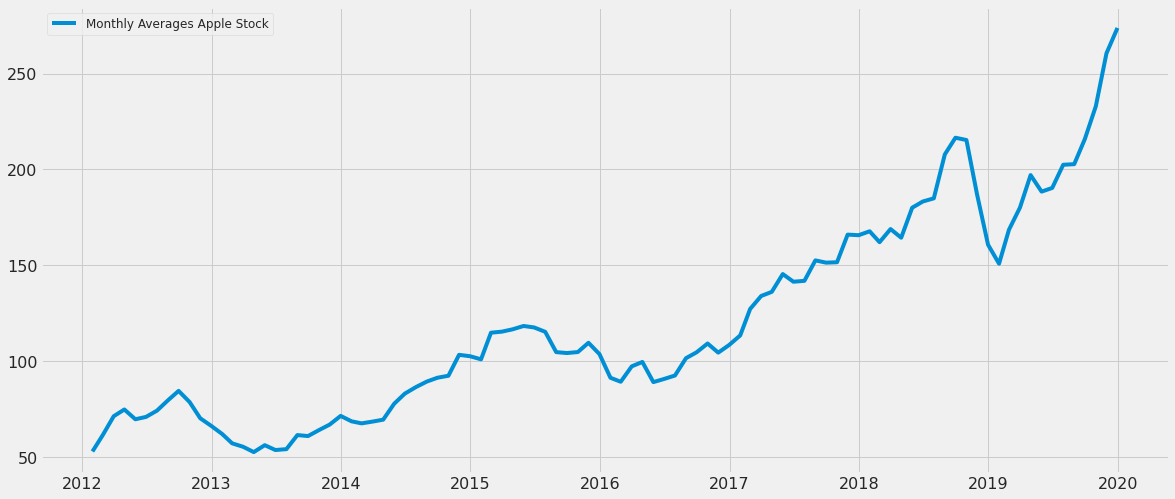

In [ ]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

The provided code generates a line plot to visualize the monthly average stock prices of Apple (represented by the 'Adj Close' column) using the `monthly_data` DataFrame.  The `fig = plt.figure(figsize=(18,8))` line creates a new figure object with a specific size of 18x8 inches, which will be used as the canvas for the plot.  The `plt.plot(monthly_data['Adj Close'], label='Monthly Averages Apple Stock')` line plots the values from the 'Adj Close' column of the `monthly_data` DataFrame on the The y-axis is plotted against the corresponding x-axis dates. It also adds a label to the plot for identification purposes.  The `plt.xticks(fontsize=16)` and `plt.yticks(fontsize=16)` lines set the font size of the tick labels on the x-axis and y-axis, respectively.  The `ax.set_title('Monthly Resampled Data')` line sets the title of the plot to 'Monthly Resampled Data'.  Styling elements are applied to the plot, such as the 'fivethirtyeight' style (`plt.style.use('fivethirtyeight')`), and a legend is added to identify the line plot (`plt.legend(prop={'size': 12})`).  Finally, `plt.show()` is called to display the generated line plot. This code generates a line plot that represents the monthly average stock price of Apple. This plot shows the trend and fluctuation of stock prices on a monthly basis. Dates are represented by the x-axis, and average stock prices are represented by the y-axis. This plot provides an overview of Apple stock's historical performance and can assist in identifying patterns or trends.

Analyzing exploratory data

In [19]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

Adj Close  Year      Month  dayofweek  quarter
Date                                                       
2012-01-31   52.907298  2012    January    Tuesday        1
2012-02-29   61.424381  2012   February  Wednesday        1
2012-03-31   71.292448  2012      March   Saturday        1
2012-04-30   74.810151  2012      April     Monday        2
2012-05-31   69.708045  2012        May   Thursday        2
...                ...   ...        ...        ...      ...
2019-08-31  202.738817  2019     August   Saturday        3
2019-09-30  215.853332  2019  September     Monday        3
2019-10-31  232.974974  2019    October   Thursday        4
2019-11-30  260.569057  2019   November   Saturday        4
2019-12-31  273.780718  2019   December    Tuesday        4

[96 rows x 5 columns]

The provided code adds several new columns to the `monthly_data` DataFrame, containing additional information derived from the index of the DataFrame. In the provided code, we create a column named 'Year' in the `monthly_data` DataFrame. It extracts the year component from the index dates and assigns the corresponding year values to this new column. By inserting monthly_data.index.strftime('%B'), another column is created named 'Month' in the DataFrame. It uses the `strftime()` function to format the index dates as the full name of the month (e.g., 'January', 'February', etc.), and assigns these formatted month names to the 'Month' column.

Similarly, the line `monthly_data['dayofweek'] = monthly_data.index.strftime('%A')` creates a column named 'dayofweek' in the DataFrame. It uses `strftime()` to format the index dates as the full name of the day of the week (e.g., 'Monday', 'Tuesday', etc.), and assigns these formatted day names to the 'dayofweek' column.

Finally, the line `monthly_data['quarter'] = monthly_data.index.quarter` creates a column named 'quarter' in the DataFrame. A quarter component is extracted from the index dates and the corresponding quarter values are assigned to the column 'quarter'. By adding these new columns, the code enhances the `monthly_data` DataFrame with additional information about the year, month, day of the week, and quarter associated with each monthly observation. Based on these temporal components, these columns can be used for further analysis, grouping, or visualization.

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 <a list of 7 Text major ticklabel objects>)

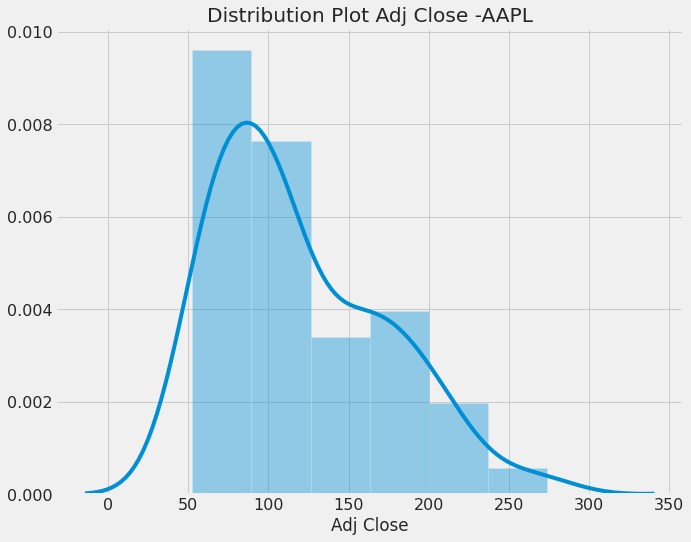

In [ ]:
##Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


The provided code generates a distribution plot to visualize the distribution of the 'Adj Close' values in the `monthly_data` DataFrame, representing the adjusted closing prices of Apple stock.  The `fig = plt.figure(figsize=(10,8))` line creates a new figure object with a specific size of 10x8 inches, which will be used as the canvas for the plot.  The `sns.distplot(monthly_data['Adj Close'])` line uses the seaborn library (`sns`) to generate a distribution plot of the 'Adj Close' column from This DataFrame contains monthly data. In the distribution plot, the data values are shown and the probability density function is estimated. This line provides a descriptive label for the plot by setting the title to "Distribution Plot Adj Close -AAPL". In order to style the plot, a number of styling elements are applied, such as setting the size of the tick label on the axis (`ax.tick_params(labelsize=12)`), setting the font scale (`sns.set(font_scale=1)`), and adjusting the font size of By executing this code, a distribution plot is generated, providing insight into the distribution and shape of Apple stock's "Adj Close" values. Using this plot, you can visualize the adjusted closing prices' central tendency, spread, skewness, and other characteristics. Outliers can be identified, symmetry and asymmetry of the data can be assessed, and further statistical analysis or modeling can be informed.

Inference from Distribution Plot: Distribution shows a right skew

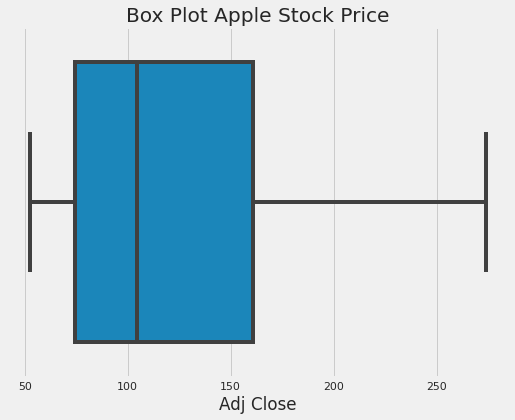

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')


The provided code generates a box plot to visualize the distribution and statistical summary of the 'Adj Close' values in the `monthly_data` DataFrame, representing the adjusted closing prices of Apple stock.  The `fig = plt.figure(figsize=(8,6))` line creates a new figure object with a specific size of 8x6 inches, which will be used as the canvas for the plot.  The `sns.boxplot(monthly_data['Adj Close'])` line uses the seaborn library (`sns`) to create a box plot of the 'Adj Close' column from This DataFrame contains the monthly data. A box plot displays the distribution of the data by showing the quartiles, the median, and any potential outliers.

The `.set_title('Box Plot Apple Stock Price')` line sets the title of the plot to 'Box Plot Apple Stock Price', providing a descriptive label for the plot.

Styling elements are applied to the plot, such as setting the 'fivethirtyeight' style (`plt.style.context('fivethirtyeight')`). This style sets the visual appearance of the plot to match the distinctive aesthetic associated with the 'fivethirtyeight' theme. The result is a box plot that shows the distribution of Apple stock's 'Adj Close' values. A plot shows the minimum and maximum values, the lower and upper quartiles, the median (middle value), and any outliers. Using adjusted closing prices, it can determine the central tendency, spread, skewness, and presence of potential outliers. Box plots are useful for comparing distributions, identifying unusual data points, and understanding variability.

Box plot inferences: In the monthly_data DataFrame, the distribution of 'Adj Close' values is right-skewed, indicating that the majority of stock prices are concentrated towards the lower end of the range, with a few higher values extending the right tail. Box plots reveal an outlier at the top of the distribution, specifically around 300 dollars. Data points that are considered outliers deviate significantly from the typical range of values observed in the dataset.

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

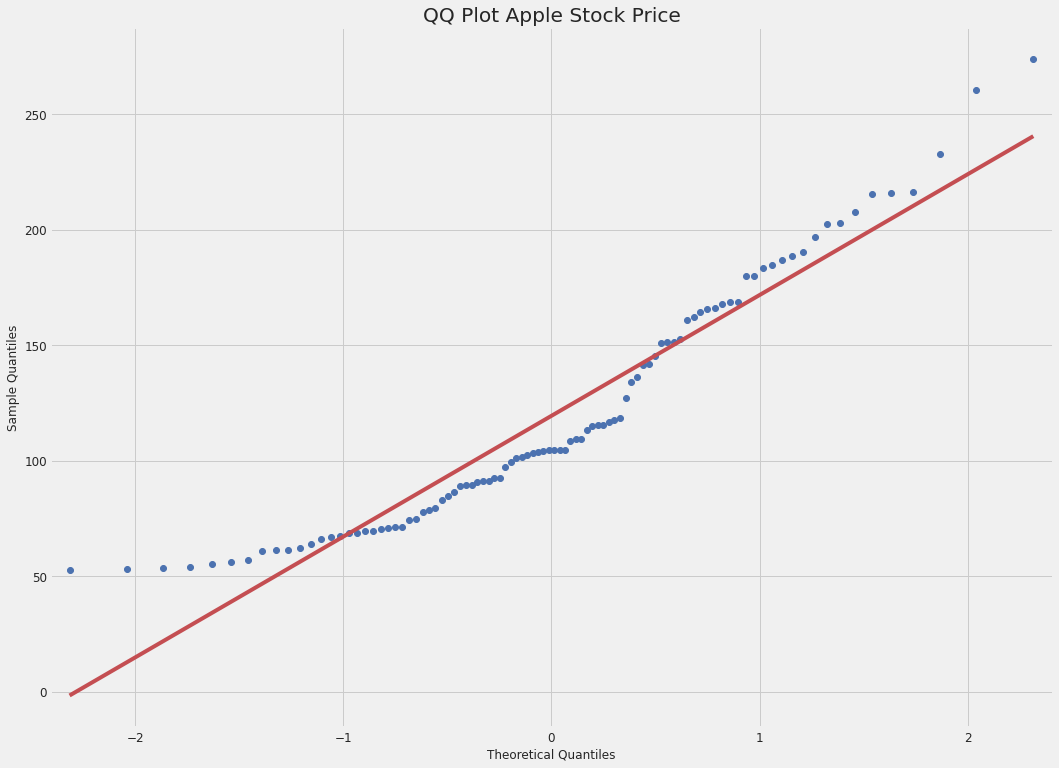

In [ ]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

The provided code generates a QQ plot to assess the normality of the distribution of the 'Adj Close' values in the `monthly_data` DataFrame, which represents the adjusted closing prices of Apple stock.

The `qq()` function, likely from the `statsmodels.graphics.gofplots` module, is used to create the QQ plot. The `qq()` function takes two arguments: the first argument is the data to be plotted, which in this case is the 'Adj Close' column from the `monthly_data` DataFrame, and the `line='s'` parameter indicates that a standardized line should be displayed on the plot.  The `plt.title('QQ Plot Apple Stock Price')` line sets the title of the plot to 'QQ Plot Apple Stock Price', providing a descriptive label for the plot.  By executing this code, a QQ plot is generated, which is a graphical tool used to Analyze whether a dataset follows a normal distribution. A QQ plot compares the quantiles of the dataset to the quantiles of a theoretical normal distribution. If the points on the plot closely align with the diagonal line (the standardized line), it suggests that the data closely follows a normal distribution. The QQ plot can be used to determine where the 'Adj Close' values depart from normality. The diagonal line can be deviated from normality by skewness, heavy tails, or other characteristics of the distribution. The QQ plot can be used to assess the suitability of assuming a normal distribution for further statistical analysis or modeling.

QQ Plot Inferences: The QQ plot shows that the distribution of the 'Adj Close' values in the monthly data frame has heavy tails at the extremes. This means that the dataset contains values that are further away from the mean than expected in a normal distribution. As can also be seen from the QQ plot, the distribution exhibits both right and left skews. The dataset is not symmetrical and shows a tendency towards higher or lower values on one side. According to the QQ plot, the distribution of the 'Adj Close' values does not follow a Gaussian distribution. The points on the plot deviate significantly from the diagonal line, indicating departures from normality. Interpreting the QQ plot allows us to gain insight into the distribution's shape and characteristics. Heavy tails indicate extreme values, while skews indicate asymmetry. As a result of these departures from normality, appropriate statistical techniques or models are required that can explain the observed distributional characteristics of stock prices.

In [ ]:
print('Skewness of Distribution is ',monthly_data['Adj Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Adj Close'].kurtosis())

Skewness of Distribution is  0.8054131572723984
Kurtosis of Distribution is  -0.11205074257880465


The provided code calculates and prints the skewness and kurtosis values for the distribution of the 'Adj Close' values in the `monthly_data` DataFrame, representing the adjusted closing prices of Apple stock.

The `.skew()` function is applied to the 'Adj Close' column of the `monthly_data` DataFrame. A distribution's skewness measures its asymmetry. Positive skewness indicates a longer or fatter tail on the right side of the distribution, while negative skewness indicates a longer or fatter tail on the left side. By printing `monthly_data['Adj Close'].skew()`, the code displays the calculated skewness value for the distribution. Also, the kurtosis function is applied to the column 'Adj Close'. A distribution's kurtosis is determined by the heaviness of its tails and the sharpness or flatness of its peak. A positive kurtosis value indicates heavier tails and a sharper peak (leptokurtic), while a negative kurtosis value indicates a lighter tail and a flatter peak (platykurtic). By printing `monthly_data['Adj Close'].kurtosis()`, the code displays the calculated kurtosis value for the distribution.

Printing these skewness and kurtosis values provides quantitative measures that help describe the shape and characteristics of the distribution of the adjusted closing prices. A distribution's skewness value indicates how skewed it is to the right or left, while its kurtosis value indicates how peaked it is. Data analysis using these measures provides insight into the departure of the distribution from a normal distribution and provides insight into the dataset's underlying statistical properties.

The stock price is heavily skewed - right-tailed skewness


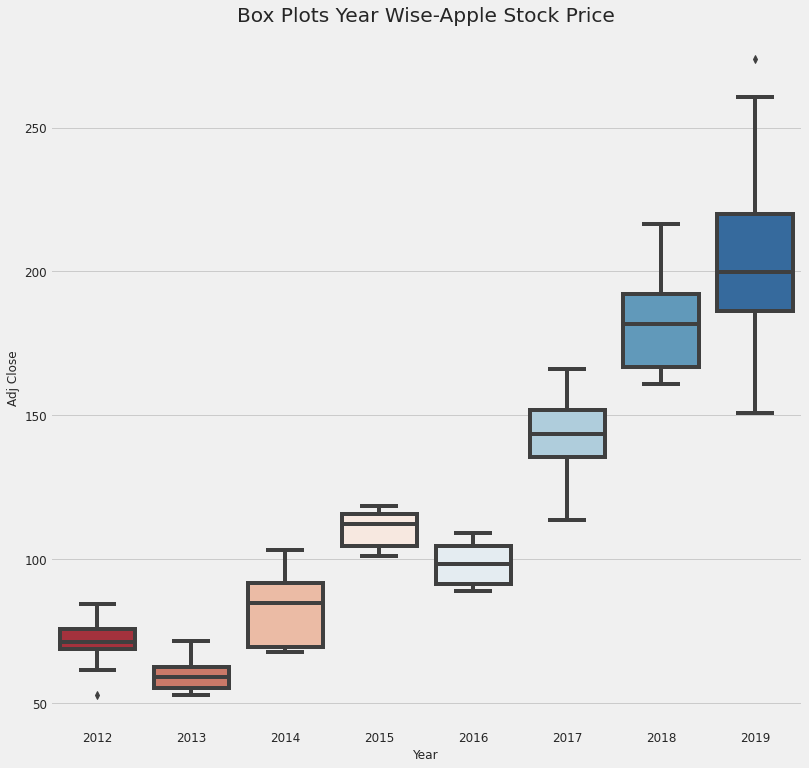

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

The provided code generates a set of box plots to visualize the distribution of the 'Adj Close' values in the `monthly_data` DataFrame, representing the adjusted closing prices of Apple stock, grouped by year.  The `plt.figure(figsize=(12,12))` line creates a new figure object with a specific size of 12x12 inches, which will be used as the canvas for the box plots.  The `sns.boxplot(x=monthly_data['Year'], y=monthly_data['Adj Close'], palette='RdBu')` line uses the seaborn library (`sns`) to Make a box plot. This graph uses the 'Year' column from the `monthly_data` DataFrame as the x-axis variable and the 'Adj Close' column as the y-axis variable. Each box represents the distribution of 'Adj Close' values for a given year, resulting in a set of box plots. The `palette='RdBu'` parameter sets the color palette for the boxes.

The `ax.set_title('Box Plots Year Wise-Apple Stock Price')` line sets the plot title to 'Box Plots Year Wise-Apple Stock Price', providing a descriptive title for the plot. Several styling elements are applied to the plot, including the 'fivethirtyeight' style (`plt.style.context('fivethirtyeight')`). This style sets the visual appearance of the plot to match the distinctive aesthetic associated with the 'fivethirtyeight' theme. This code generates box plots for each year showing the distribution of the 'Adj Close' values. For each year, the box plots show the central tendency, spread, and potential outliers. As a result, it is easier to compare the distributional characteristics between different years and identify patterns or changes in stock prices.

Box plot inferences: For the distribution of the 'Adj Close' values, the box plots reveal outliers in 2012 and 2019. Outliers are data points that are significantly different from the typical range of values observed within those specific years. 2. The distributions for 2014, 2017, 2018, and 2019 show notable variability. It appears that Apple stock's adjusted closing prices exhibited a wide range of values during these years, which may indicate market conditions or investor sentiment are fluctuating. 2019 appears to be the most volatile year of all. There was a greater degree of variability and possible extreme price movements during that year based on the box plot and the presence of outliers. Over the years, the adjusted closing prices also show an upward trend. As can be seen from the general upward shift in the medians and the higher position of the upper quartile in the later years, this is the case. The box plots provide insight into each year's adjusted closing price distribution and characteristics. Outliers, variability, and trends can provide insight into the stock price dynamics over time.

In [ ]:
group_by_yr = []
list_years = monthly_data['Year'].unique()
dict_IQR = {}
for yr in list_years:
  group_by_yr.append('df' + str(yr)) 

for enum,yr in enumerate(list_years):
   group_by_yr[enum] = monthly_data[str(yr)]['Adj Close']
   dict_IQR[str(yr)] = stats.iqr(group_by_yr[enum])

This code performs the following operations: Creates an empty list named `group_by_yr` for storing individual DataFrame objects. Provides a list of unique years based on the year column in the monthly data structure. Creates an empty dictionary named `dict_IQR` for storing the interquartile ranges (IQRs) calculated for each year. Iterates through the list of unique years:     - Appends a string representing a DataFrame object to the `group_by_yr` list, where each object is named based on the year.     - Assigns the 'Adj Close' values corresponding to the current year to the respective DataFrame object in the `group_by_yr` list.     - Calculates the interquartile range (IQR) for the 'Adj Close' values of the current year and stores it in the `dict_IQR` dictionary, using the year as the key.  The code essentially organizes Divide the 'Adj Close' values from the monthly data DataFrame into separate DataFrames, each representing a particular year. It also calculates and stores the IQR for each year in a dictionary. It allows easy access and analysis of 'Adj Close' values for each year by creating separate DataFrames. The IQR values stored in the `dict_IQR` dictionary offer information about the spread and variability of the 'Adj Close' values over time. Various calculations, comparisons, and visualizations involving the yearly data can be performed using these data structures.

In [ ]:
##Interquartile Range(IQR) Year Wise for Stock Price
dict_IQR

{'2012': 6.9331465153138225,
 '2013': 7.476562772903719,
 '2014': 22.342963448240184,
 '2015': 11.10740590584416,
 '2016': 13.310573720864667,
 '2017': 16.22455365139379,
 '2018': 25.262020365941993,
 '2019': 33.7839948399986}

The provided code calculates and stores the interquartile range (IQR) for the 'Adj Close' values of each year in the `monthly_data` DataFrame, representing the adjusted closing prices of Apple stock.

The `dict_IQR` dictionary is initialized to store the calculated IQR values for each year. It will serve as a container to hold the results. This code iterates over each unique year in the `monthly_data` DataFrame. For each year:
- A key is created in the `dict_IQR` dictionary using the year as the key name.
- The IQR is calculated for the 'Adj Close' values corresponding to the current year and assigned as the value for the respective key in the `dict_IQR` dictionary.

By executing this code, the `dict_IQR` dictionary will contain the calculated IQR values for each year. IQR represents the range between the 25th and 75th percentiles of a distribution. As a result, it provides insights into the spread and variability of the 'Adj Close' values. In order to understand the yearly differences in the stock price range and variability, this information can be analyzed, compared, or visualized.

Text(0, 0.5, 'InterQuartile Range')

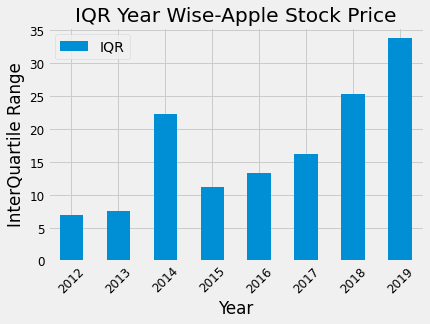

In [ ]:

IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise-Apple Stock Price')
plt.ylabel('InterQuartile Range')


In the provided code, the following operations are performed: Using the analytic data in the dictionary (dict_IQR), this method creates a new DataFrame called IQR_df. Using the items() method, dictionary items are converted into tuples, which is then used to construct the DataFrame. In the DataFrame, the columns 'Year' and 'IQR' represent the year and interquartile range (IQR) values. Sets the IDAR_DF DataFrame's Year column as the index. In this step, the data can be easily accessed and manipulated based on the year. Uses the plot() function with the kind='bar' to generate a bar plot. A plot of the 'Year' column is shown on the x-axis, while a plot of the 'IQR' values is shown on the y-axis. In this plot, the interquartile range is visualized for each year. By rotating the x-axis tick labels 45 degrees, the tick labels will be easier to read. 5. PLT.style.context('fivethirtyeight') sets the 'fivethirtyeight' style. In this style, the visual appearance of the plot matches the distinctive aesthetic associated with the 'fivethirtyeight' theme. Plot title is set to 'IQR Year Wise-Apple Stock Price' via plot.title('IQR Year Wise-Apple Stock Price'). Sets the label for the y-axis as 'InterQuartile Range' using `plt.ylabel('InterQuartile Range')`. This code generates a bar plot showing the interquartile range (IQR) of Apple stock's adjusted closing prices for each year. IQR values are easily compared across different years with the plot, providing insights into the spread and variability of stock prices. On the plot, the x-axis represents the years, the y-axis represents the IQR values, and the height of each bar represents the magnitude of the IQR.

From the provided information, the following conclusions can be drawn: In cases where data do not follow a normal distribution, the interquartile range (IQR) is a better measure of variability than standard deviation. In contrast to the standard deviation, the IQR is not affected by outliers, making it a robust measure of spread that captures the range between the 25th and 75th percentiles. According to the box plot, Apple stock has been most volatile in 2014 and 2019. Box plots for these years illustrate this volatility by their wider spreads and outliers. Outliers represent extreme values that deviate significantly from the majority of the data points, while the wider spread indicates a broader range of prices. As a result of these observations, Apple stock prices experienced notable fluctuations between 2014 and 2019. The box plots show that the interquartile range is a more appropriate measure of variability when considering the non-normality of the data and identifying years when the Apple stock price fluctuated the most.

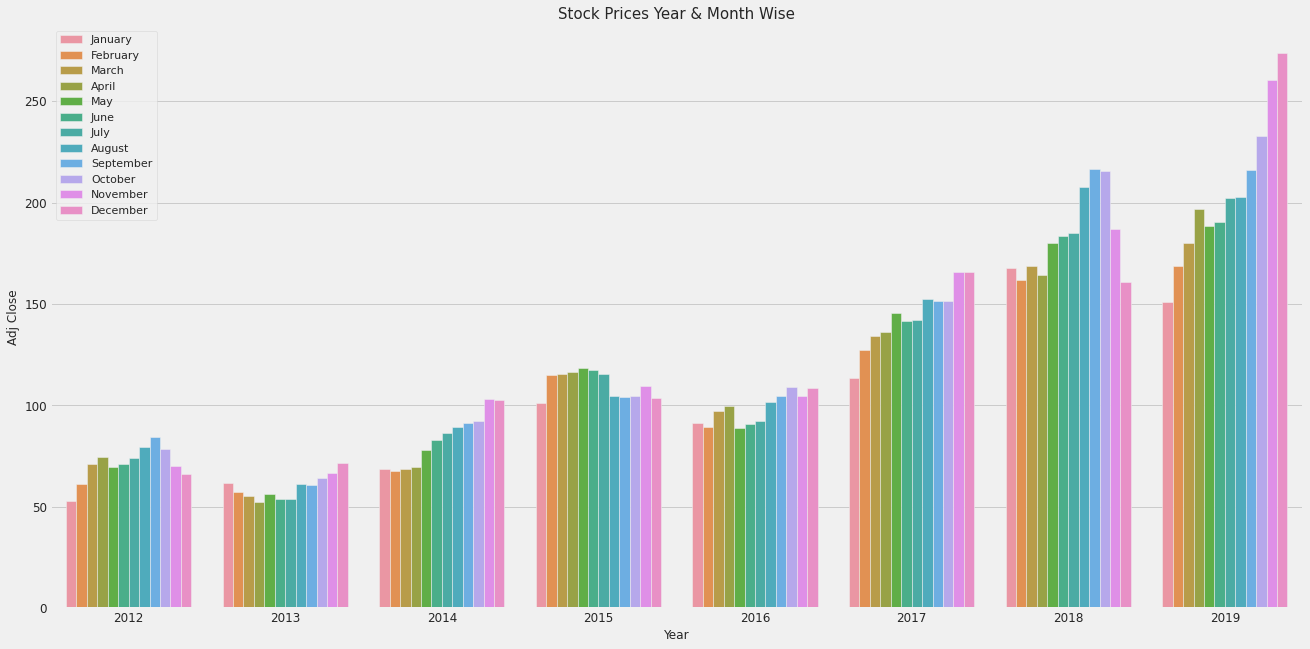

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

The provided code generates a grouped bar plot to visualize the stock prices year and month-wise in the `monthly_data` DataFrame, which represents the adjusted closing prices of Apple stock.

The `fig, ax = plt.subplots(figsize=(20,10))` line creates a new figure object with a specific size of 20x10 inches, and assigns the figure object to `fig` and an axis object to `ax`. This figure and axis will be used as the canvas for the bar plot. This line sets a color palette named "mako_r" with four colors. This palette will be used to differentiate the bars representing different months. This line is called through sns.barplot() and uses seaborn (sns) to create the bar chart. The 'Year' column is used as the x-axis variable, the 'Adj Close' column as the y-axis variable, and the 'Month' column as the hue variable. This results in a grouped bar plot, where each bar represents the stock prices for a specific year, and the bars within each year are further divided into segments based on the months.  The `a.set_title("Stock Prices Year & Month Wise", fontsize=15)` line sets the title of the plot to "Stock Prices Year & Month Wise", providing a descriptive label for the plot.  The `plt.legend(loc='upper left')` line adds a legend to the plot, which indicates the color-coding for the different months.  By This code generates a grouped bar plot that allows visual comparisons of stock prices across different years and months. Plots provide insight into stock prices within and between years, as well as monthly patterns or trends.

Comparing July-September to other months, the period from July-September seems to push stock prices higher. As Apple has a product cycle release date during this time, Wall Street is excited about upcoming products.



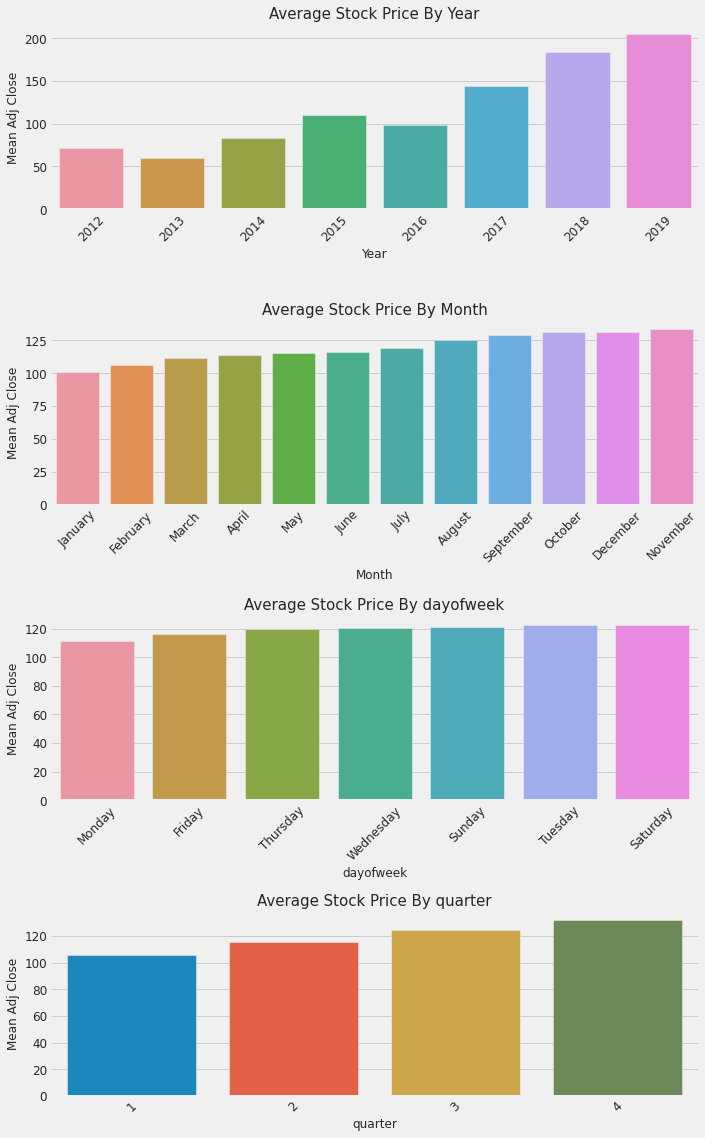

In [ ]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

The provided code generates a set of bar plots to visualize the average stock prices based on different grouping variables in the `monthly_data` DataFrame, which represents the adjusted closing prices of Apple stock.

The `fig = plt.figure(figsize=(10,16))` line creates a new figure object with a specific size of 10x16 inches. This figure will be used as the canvas for the bar plots. This line retrieves the column names from the monthly_data DataFrame and assigns them to group_cols. These column names will be used as the grouping variables.  The code then iterates over the grouping variables starting from the second column (`group_cols[1:]`) using `enumerate` to access both the index and the column name (`enum, i`).  For each grouping variable: - An axis object (`ax`) is added to the figure using `fig.add_subplot(4,1,enum+1)`, creating a subplot for each grouping variable. - The `Aggregated` DataFrame is created by grouping the 'Adj Close' column based on the current grouping variable ('i'), calculating the mean, and sorting the values in ascending order. - A bar plot is generated using `sns.barplot()` with the 'x' variable as the current grouping variable ('i'), the 'y' variable as the 'Adj Close' column, and the 'ax' parameter to specify the subplot. - The x-label is set to the current grouping variable, and the y-label is set to 'Mean Adj Close' using `ax.set(xlabel=str(i), ylabel='Mean Adj Close')`. - The title of the plot is set to "Average Stock Price By [grouping variable]" using `ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)`. - The x-axis tick labels are rotated by 45 degrees for better readability using `plt.xticks(rotation=45)`.  Finally, the `plt.tight_layout(pad=1)` line adjusts the spacing between the subplots to avoid overlapping.  By executing this code, a set of bar plots is generated, with each plot representing the average stock prices based on different grouping variables. Plots provide insights into average stock prices within different categories or groups, identifying any patterns or variations in stock prices.

Based on the provided information, we can draw the following conclusions: In 2013, and 2016, the average stock price was lower than the previous year, according to the mean price by years. The average stock price declined during those years compared to the preceding year. Stock prices tend to be lower at the start of the week than at the end. Stock prices generally show an upward trend as the week progresses, potentially influenced by market dynamics or investor behavior. November has the highest average stock price of the year. Accordingly, November tends to be a favorable month for Apple stock, possibly due to specific market events or company-related factors. The fourth quarter (Q4) of Apple's fiscal year is the best according to the average stock price analysis. Due to the new product cycle and the holiday season, Q4 is typically a strong period for Apple's sales figures. In Q4, the average stock price increased due to Apple's product launches and increased consumer demand, indicating a positive market response. Insights into Apple's average stock price trends and patterns can be gained from these inferences. The stock prices for specific periods, such as years, weeks, months, and quarters, exhibit distinct behavior. In order to make informed decisions regarding Apple stock, investors and analysts should understand these patterns.

Time series decomposition


<Figure size 1440x1152 with 0 Axes>

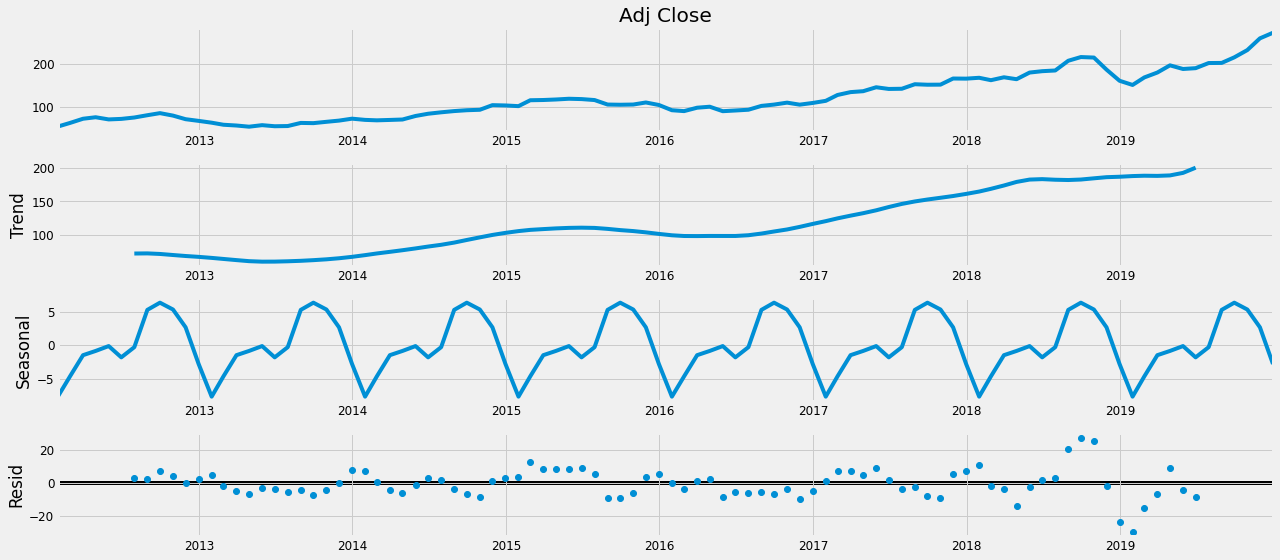

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive',freq=12)
decomposed_series.plot()
plt.show()

This code performs the following operations: This setting sets the default figure size to 18 inches wide and 8 inches high. In this way, subsequent plots will have this specified size by default. A figure object with a size of 20x16 inches is created using plt.figure(figsize=(20,16)). This figure will serve as the plot's canvas. Utilizes the seasonal_decompose() function in the statisticsmodels.tsa.seasonal module to decompose the 'Adj Close' values from the dataframes weekly_data and monthly_data. In this case, the decomposition model is 'additive', and the frequency is set to 12, indicating monthly data. Using decomposed_series.plot(), plot the decomposed series. There will be multiple subplots showing the original series, trend component, seasonal component, and residual component. Displays the plot using `plt.show()`, showing the decomposed series. The plot visualizes the trend, seasonality, and residual components of the 'Adj Close' values. In understanding the underlying patterns and variations in the data, this decomposition is helpful. Apple stock adjusted closing prices can be examined using the plot to examine the overall trend, seasonal fluctuations, and random fluctuations (residuals).

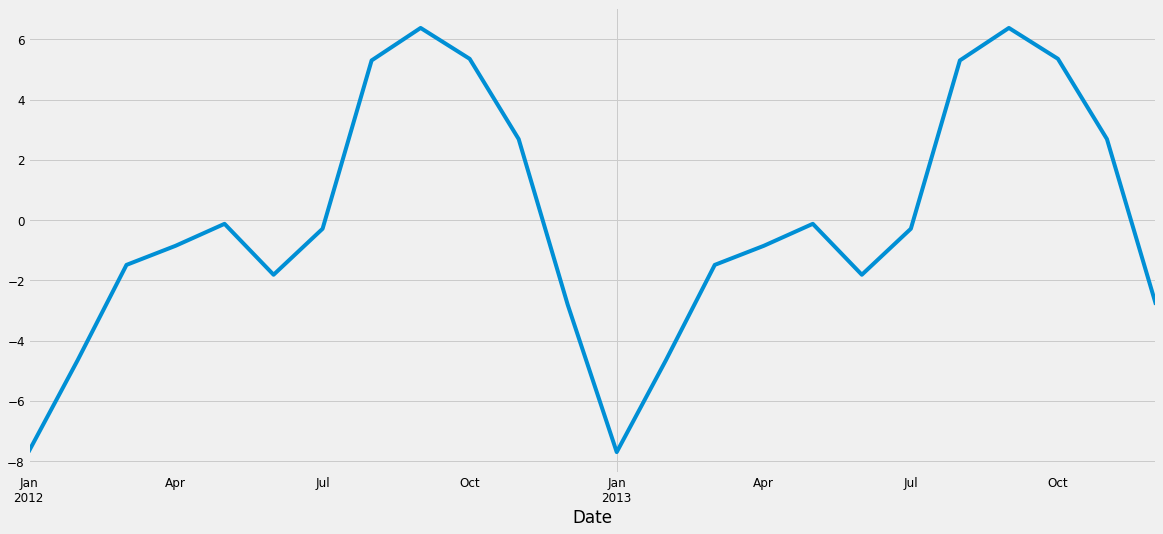

<Figure size 576x576 with 0 Axes>

In [ ]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

This code performs the following operations: Uses decomposed_series.seasonal['2012':'2013'].plot() to plot the seasonal component. The code generates a plot specifically for the time period between 2012 and 2013 by subtracting the seasonal component from the decomposed series. During that period, the plot visualizes seasonal patterns or fluctuations in the adjusted closing prices of Apple stock. This method creates a new figure object with a specific size of 8x8 inches by using `fig = plt.figure(figsize=(8,8))`. This figure will be used as the canvas for the subsequent plot. The code generates two plots. In the first plot, we can examine the seasonal patterns or fluctuations in the adjusted closing prices of Apple stock between 2012 and 2013, specifically. With the second plot, which uses the new figure object, you can generate additional visualizations or analyses related to the seasonal component.

The following conclusions can be drawn from the decomposition: The adjusted closing prices of Apple stock show an overall upward trend. This suggests that, on average, stock prices have increased over time. Data seasonality is also indicated by the decomposition. Holiday-related patterns or fluctuations are evident in the seasonal component. During the holiday season, which is characterized by increased Apple sales, Apple stock tends to rally. This seasonality effect has been observed consistently over the years. Based on the decomposition results, we can conclude that Apple stock's adjusted closing prices have shown an upward trend, suggesting long-term growth. Moreover, Apple's sales and stock performance are affected by seasonality during the holiday season. Investors and analysts can use these insights to make informed decisions regarding Apple stock by understanding the underlying patterns and factors influencing the stock price.

Time series stationarity 

Time series stationarity can be evaluated using the Augmented Dickey-Fuller (ADF) test. The purpose of this test is to determine whether the time series has a unit root (indicating non-stationarity) or not. ADF involves testing two hypotheses: 1. The time series has a unit root, indicating that it is not stationary. In other words, the time series exhibits a changing mean or variance, indicating a trend or seasonality. Alternative Hypothesis: The time series does not have a unit root, indicating it is stationary. In this case, the time series exhibits a constant mean and variance, indicating the absence of a trend or seasonality. The ADF test rejects the null hypothesis and supports the alternative hypothesis. On the other hand, if the test fails to reject the null hypothesis, it indicates that the time series is non-stationary. Stationary series have a constant mean, constant variance, and no trend. As a result of these properties, stationary time series are more predictable, making them suitable for various time series analysis techniques and models.

In [ ]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')



The provided code defines a function named `ad_fuller_func` that performs the Augmented Dickey-Fuller (ADF) test on a given time series, using the `adfuller()` function from the statsmodels library.

The `ad_fuller_func` function takes a time series `X` as input and performs the ADF test. Here's what the code does: Adfuller() is called with the time series `X` as the argument. Using this function, you can compute the ADF statistic, p-value, and critical values for the ADF test. ADF statistics are printed using print('ADF Statistic: %f' % result_ad_fuller[0]). It measures the strength of evidence against the null hypothesis of a unit root in the series. A p-value is printed using print('p-value: %f' %result_ad_fuller[1]). Probability that the null hypothesis is true is represented by this value. The lower the p-value, the stronger the evidence against the null hypothesis. In order to print the critical values, a loop iterates over the items in `result_ad_fuller[4]`, which contains the critical values at different significance levels. This information helps determine the rejection region for the null hypothesis. The function determines whether to reject the null hypothesis based on the ADF statistic and critical values. At a certain significance level (5% in this case), the ADF statistic is lower than the critical value, indicating that the time series is stationary. As a result, the null hypothesis is not rejected if the ADF statistic is greater or equal to the critical value. When this code is executed and called with a specific time series argument, the ADF test results will be printed, including the ADF statistic, p-value, critical values, and whether the null hypothesis should be rejected. It helps determine the appropriate modeling and analysis techniques based on the stationarity properties of the time series.

In [ ]:
ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 1.339253
p-value: 0.996820
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Failed to Reject Ho-Time Series is Non-Stationary


The provided code calls the `ad_fuller_func` function, passing the 'Adj Close' column from the `monthly_data` DataFrame as an argument.

The `ad_fuller_func` function performs the Augmented Dickey-Fuller (ADF) test on the given time series, which represents the adjusted closing prices of Apple stock. The purpose of this test is to evaluate the stationarity of the time series. The function calculates the ADF statistic, the p-value, and the critical values for the ADF test. It then prints these statistical results. ADF measures the strength of evidence against the null hypothesis of non-stationarity. P-values represent the probability that the null hypothesis is correct. The critical values are thresholds that help determine the rejection region for the null hypothesis. The function rejects the null hypothesis based on these results. The null hypothesis is rejected if the ADF statistic is lower than the critical value at a certain significance level (such as 5%). Conversely, if the ADF statistic is greater than or equal to the critical value, the null hypothesis is not rejected, suggesting that the time series is non-stationary.

By calling `ad_fuller_func(monthly_data['Adj Close'])`, the code performs the ADF test specifically on the adjusted closing prices of Apple stock and provides insights into the stationarity of this time series. Modeling and analysis techniques can be selected based on this information.

Apple stock's adjusted closing prices are determined to be nonstationary. Based on the earlier analysis of the decomposition, both trend and seasonality components were detected. The Augmented Dickey-Fuller (ADF) test is also conducted to verify the nonstationarity of the time series. Using the ADF test, the time series is clearly non-stationary, thus proving against the null hypothesis of a unit root. Therefore, both the visual examination of the decomposition and the statistical analysis through the ADF test confirm that the time series of the adjusted closing prices of Apple stock exhibit characteristics of non-stationarity. When choosing appropriate time series models and analyzing the data for further insights or predictions, these findings are important to consider.

ACF (AutoCorrelation Function)

Text(0.5, 0, 'Lags')

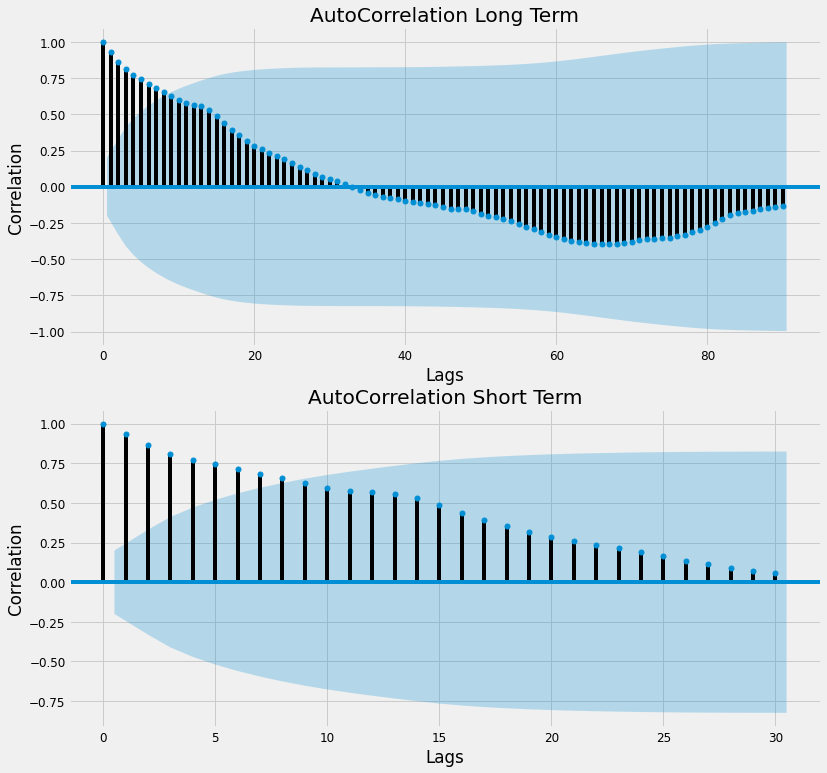

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

The provided code generates two subplots within a figure to visualize the autocorrelation of the adjusted closing prices of Apple stock at different lag intervals. It does the following: Figure, (ax1, ax2) = plt.subplots(2, figsize=(12, 12)) creates a figure with two subplots. Ax1 and Ax2 are assigned to the subplots. Figure size is set to 12x12 inches. The `acf = plot_acf(monthly_data['Adj Close'], lags=90, ax=ax1)` line plots the autocorrelation function (ACF) for the adjusted closing prices of Apple stock on the first subplot (`ax1`). The `lags` parameter is set to 90, meaning that the autocorrelation is calculated for a range of 90 lag intervals. Ax1.set_title('AutoCorrelation Long Term') sets the title for the first subplot to "AutoCorrelation Long Term". The `acf = plot_acf(monthly_data['Adj Close'], lags=30, ax=ax2)` line plots the autocorrelation function (ACF) for the adjusted closing prices of Apple stock on the second subplot (`ax2`). The `lags` parameter is set to 30, meaning that the autocorrelation is calculated for a range of 30 lag intervals. The `ax2.set_title('AutoCorrelation Short Term')` line sets the title of the second subplot as "AutoCorrelation Short Term". The `ax1.set_ylabel('Correlation')` and `ax1.set_xlabel('Lags')` lines set the y-axis label as "Correlation" and the x-axis label as "Lags" for the first subplot (`ax1`), respectively.

7. Similarly, the `ax2.set_ylabel('Correlation')` and `ax2.set_xlabel('Lags')` lines set the y-axis label as "Correlation" and the x-axis label as "Lags" for the second subplot (`ax2`), respectively. This code generates two subplots within one figure. In the first subplot, the autocorrelation of Apple stock's adjusted closing prices is shown for a longer lag interval (90 lags), while in the second subplot, it is shown for a shorter lag interval (30 lags). The plots help identify significant autocorrelation patterns by revealing the degree of correlation between stock prices at different time lags.

Interpreting the ACF plot: Step 1: In the ACF plot, the correlation values decay slowly, indicating that future values are heavily dependent on lagged values. There is a significant relationship between the current observation and the previous observation. ACF plots indicate that the time series is not a random process, making them suitable for time series modeling. Furthermore, the ACF plot confirms that the time series is non-stationary. There is a non-zero autocorrelation at various lags, suggesting trends, seasonality, or other time-dependent patterns in the data. 3. An ACF plot can provide insight into the order of moving averages (MAs). In this case, the slow decay in the ACF plot suggests a possible MA(1) process, where the current value of the time series is dependent on the previous value plus a random error term.

In general, the ACF plot aids us in understanding the correlation structure of the time series, identifying non-random patterns, and developing forecasting or analysis models.

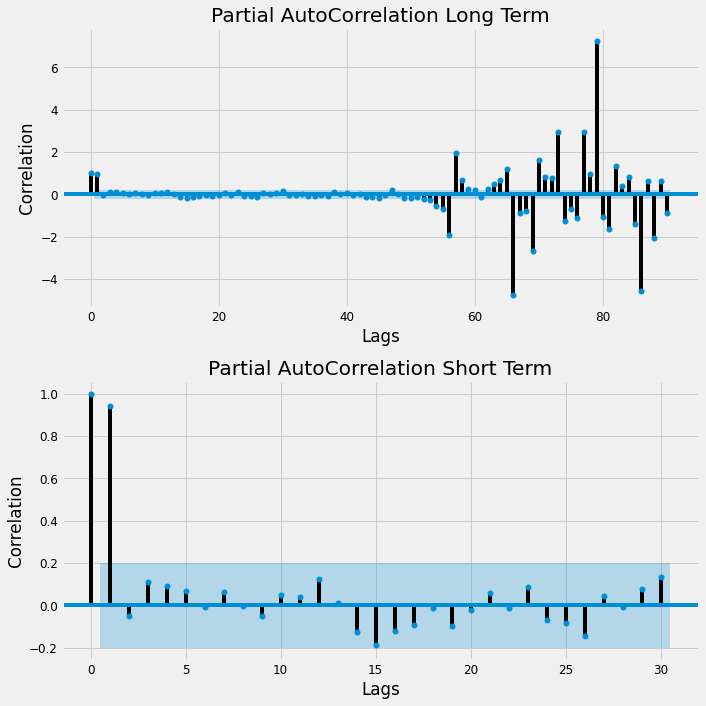

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

The provided code generates two subplots within a figure to visualize the partial autocorrelation of the adjusted closing prices of Apple stock at different lag intervals. The code is broken down as follows: Using the line fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10)), we can create a figure with two subplots. Ax1 and Ax2 are assigned to the subplots. Figure size is set to 10x10 inches. The `pacf = plot_pacf(monthly_data['Adj Close'], lags=90, ax=ax1)` line plots the partial autocorrelation function (PACF) for the adjusted closing prices of Apple stock on the first subplot (`ax1`). The `lags` parameter is set to 90, indicating that the partial autocorrelation is calculated over a range of 90 lag intervals. Ax1.set_title('Partial AutoCorrelation Long Term') sets the title for the first subplot to "Partial AutoCorrelation Long Term". The `pacf = plot_pacf(monthly_data['Adj Close'], lags=30, ax=ax2)` line plots the partial autocorrelation function (PACF) for Apple stock's adjustments (ax2). A lags parameter of 30 indicates that the partial autocorrelation is calculated for a range of 30 lag intervals. This line sets the title for the second subplot to "Partial AutoCorrelation Short Term". The `ax1.set_ylabel('Correlation')` and `ax1.set_xlabel('Lags')` lines set the y-axis label as "Correlation" and the x-axis label as "Lags" for the first subplot (`ax1`), respectively.

7. Similarly, the `ax2.set_ylabel('Correlation')` and `ax2.set_xlabel('Lags')` lines set the y-axis label as "Correlation" and the x-axis label as "Lags" for the second subplot (`ax2`), respectively.

8. The `plt.tight_layout(pad=1)` line adjusts the spacing between the subplots for better visualization. This code generates two subplots within a single figure. In the first subplot, the partial autocorrelation of the adjusted closing prices of Apple stock is shown for a longer lag interval (90 lags), and in the second subplot, the partial autocorrelation is shown for a shorter lag interval (30 lags). These plots provide insight into the partial autocorrelation structure between stock prices at different time lags.

PACF plot interpretation: A sudden decay observed at lag-1 in the PACF plot indicates a strong correlation between the current observation and the immediately preceding observation. There is a direct relationship between these two points and the partial autocorrelation at lag-1 is significant. After lag-1, there is a sudden drop in partial autocorrelation, suggesting the correlation with earlier lags is insignificant. It is indicative of an autoregressive (AR) process. This PACF plot suggests that the adjusted closing prices of Apple stock follow an AR(1) model, where the current value is primarily determined by the previous value, with little to no influence from earlier observations. It is possible to determine the potential order of the autoregressive component in the time series model by analyzing the PACF plot. By determining the lag at which partial autocorrelation becomes significant, we can identify the lag at which the partial autocorrelation becomes significant. Accordingly, an AR(1) model may be able to capture the autocorrelation structure of Apple stock's adjusted closing prices given the sudden decay at lag-1.

Making Series Stationary Through Transformations

In [ ]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

Based on Apple stock's adjusted closing prices, the provided code performs differentiating. Differencing is a common technique used in time series analysis to remove trends and make the series stationary. The code does the following: The `monthly_diff` variable stores the result of the differencing operation. Differences are made by subtracting the adjusted closing prices at the current time point (`monthly_data['Adj Close']`) from the adjusted closing prices at the previous time point (`monthly_data['Adj Close'].shift(1)`). The difference between consecutive observations is calculated here. 3. The code calculates the first-order difference by subtracting the previous value from the current value. Using this process, any trend or seasonality that may be present in the data is eliminated, transforming the series into a stationary time series. Monthly_diff represents the differenced values of adjusted closing prices. In addition to identifying patterns, fitting models, or forecasting future values, it can also be used for further analysis and modeling.

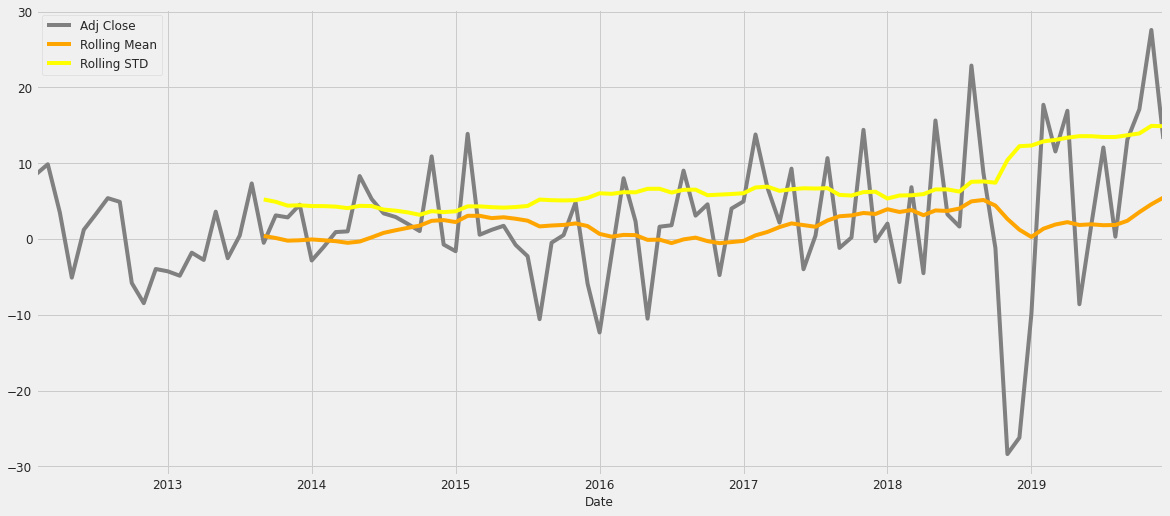

In [ ]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

The provided code generates a plot to visualize the differenced values of the adjusted closing prices of Apple stock, along with the rolling mean and rolling standard deviation. It does the following: The `monthly_diff[1:].plot(c='grey')` line plots the differenced values of the adjusted closing prices, starting with the second observation (index 1). Plot color is grey, representing the original differenced series. The `monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')` line computes and plots the differenced values' rolling mean. The average of the previous 20 observations at each point is calculated using a window size of 20. The rolling mean plot is labeled "Rolling Mean" and the color is orange. Monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow') plots the rolling standard deviation of the differenced values. Additionally, it calculates the standard deviation of the previous 20 observations at each point using a window size of 20. The rolling standard deviation plot is labeled "Rolling STD" and the color is yellow. The `plt.legend(prop={'size': 12})` line adds a legend to the plot, displaying the labels and corresponding colors for the differenced series, rolling mean, and rolling standard deviation.

This code produces a plot showing the differences between Apple stock's adjusted closing prices and the rolling mean and standard deviation. In addition to providing insights into the variability and average behavior of the data, this plot is useful for identifying trends or patterns in the differenced series.

Due to its constant mean and variance, the series appears stationary.

In [ ]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -6.501865
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Reject Null Hypothesis(Ho)-Time Series is Stationary


The provided code performs the Augmented Dickey-Fuller (ADF) test on the differenced series of the adjusted closing prices of Apple stock to check if the time series is stationary. It does the following: In this case, the `ad_fuller_func` function is called, passing the `monthly_diff[1:]` series as an argument. The function performs the ADF test on the given series. To determine the stationarity of the time series, the ADF test calculates the ADF statistic, p-value, and critical values. ADF represents the test statistic value, p-value indicates the significance level, and critical values are the thresholds for rejecting or failing to reject the null hypothesis. The function then prints the ADF statistic, p-value, and critical value. With the help of the ADF statistic and the critical values, the function provides a conclusion regarding the stationarity of the differenced series. As long as the ADF statistic is smaller than the critical value at a certain significance level (e.g., 5%), the null hypothesis is rejected. If the ADF statistic is larger than the critical value, the null hypothesis is not rejected, suggesting that the series is not stationary. To assess the stationarity of Apple stock, this code performs the ADF test on a differenced series of adjusted closing prices. We display the results of the test, including the ADF statistic, p-value, and critical value, as well as our conclusion about the series' stationarity.

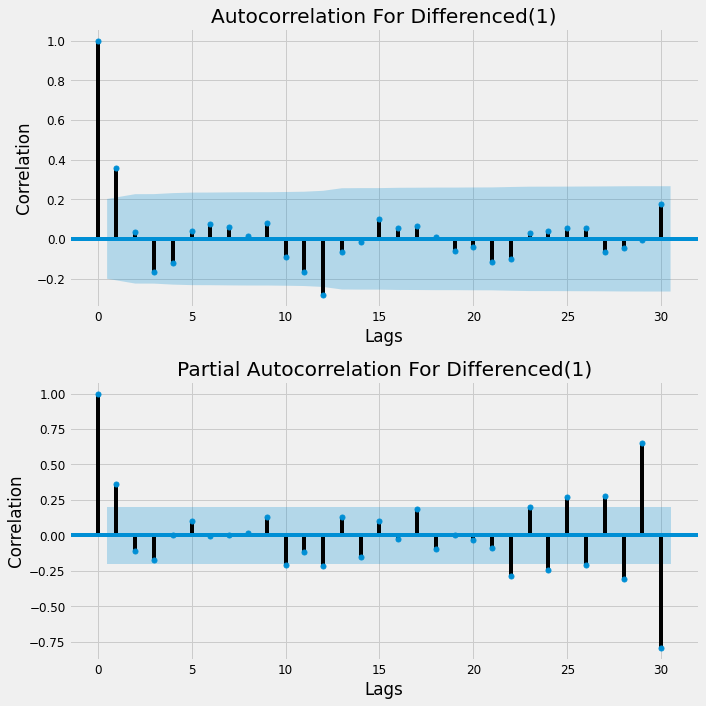

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

The provided code generates two subplots within a figure to visualize the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the differenced series of the adjusted closing prices of Apple stock. The code works as follows: This line creates a figure with two subplots arranged in a 2x1 grid using plt.subplots(2, figsize=(10, 10)). Ax1 and Ax2 are assigned to the subplots. 2. The figure size is set to 10x10 inches. Using the plot_acf(monthly_diff[1:], lags=30, ax=ax1) line, we plot the autocorrelation function (ACF) for the differenced series of adjusted closing prices (`ax1`). A lags parameter of 30 indicates that an autocorrelation is calculated for a range of 30 lags. 3. The `pacf = plot_pacf(monthly_diff[1:], lags=30, ax=ax2)` line plots the partial autocorrelation function (PACF) for the differenced series on the second subplot (`ax2`). Again, the `lags` parameter is set to 30 for calculating partial autocorrelations over a range of 30 lag intervals. The `ax1.set_title('Autocorrelation For Differenced(1)')` line sets the title of the first subplot to "Autocorrelation For Differenced(1)". The `ax1.set_ylabel('Correlation')` and `ax1.set_xlabel('Lags')` lines set the y-axis label as "Correlation" and the x-axis label as "Lags" for the first subplot (`ax1`), respectively.

6. Similarly, the `ax2.set_title('Partial Autocorrelation For Differenced(1)')`, `ax2.set_ylabel('Correlation')`, and `ax2.set_xlabel('Lags')` lines set the title, y-axis label, and x-axis label for the second subplot (`ax2`), respectively.

7. The `plt.tight_layout(pad=1)` line adjusts the spacing between the subplots for better visualization. This code generates two subplots within a single figure. There are two subplots, the first showing the autocorrelation function of the differenced series, and the second showing the partial autocorrelation function. Using these plots, we can identify any significant autocorrelations at different lags and assess the potential order of the autoregressive (AR) and moving average (MA) components.

ACF and PACF confirm that Differencing once transformed series into stationary

Seasonal ARIMA modeling

In [20]:
modelling_series = monthly_data['Adj Close']
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780718
Freq: M, Name: Adj Close, Length: 96, dtype: float64

This code assigns the values of the adjusted closing prices of Apple stock, stored in the `monthly_data['Adj Close']` series, to a new variable called `modelling_series`. 

The code does the following: The `monthly_data['Adj Close']` series contains Apple stock's adjusted closing prices. The code assigns these values to the `modelling_series` variable, creating a new series that represents the adjusted closing prices. The modified closing prices of Apple stock are contained in the modeling_series variable. Further analysis, modeling, or forecasting can be done using this variable.

Split between training and testing

In [21]:
train,test = split(modelling_series,train_size=0.6,shuffle=False)

It divides the `modelling_series` into two separate sets: a training set and a test set. 

The following is a breakdown of what the code does: 1. Split the modelling_series into train and test sets using the split function from the sklearn.model_selection module. 2. This variable is assigned the training set consisting of a portion of the modeling series. A train_size of 0.6 indicates that 60% of the data should be included in the training set. It is set to False, which means the order of the data points will not be randomized during the splitting process. The `test` variable is assigned the test set, which contains the remaining portion of the `modelling_series` data not included in the training set.

By executing this code, the `modelling_series` data is divided into a training set and a test set, with 60% of the data assigned to the training set and the remaining 40% assigned to the test set. A time series model can be trained on the training set, evaluated on the training set, and then tested on the unseen test set.

In [22]:
train.head(2)

Date
2012-01-31    52.907298
2012-02-29    61.424381
Freq: M, Name: Adj Close, dtype: float64

The provided code displays the first two rows of the training set, `train`, in order to examine the initial data points. The code is broken down as follows: It represents the training set, which was previously separated from the modeling series. 2. The `head(2)` method is called on the `train` variable, and the first two rows of the training set are returned. 3. This code displays the first two rows of the training set, providing a glimpse of the data and its structure. The training set can be explored and understood in this way.

In [23]:
test.head(2)

Date
2016-10-31    109.212791
2016-11-30    104.453936
Freq: M, Name: Adj Close, dtype: float64

The provided code displays the first two rows of the test set, `test`, in order to examine the initial data points. The code works as follows: 1. This variable represents the test set, which was previously separated from the modelling series. The `head(2)` method is called on the `test` variable, returning the first two rows. A glimpse of the data and its structure is provided by executing this code. For exploring and understanding the test set and comparing it to the training set, this can be helpful.

In [24]:
print('Train',len(train))
print('Test',len(test))

Train 57
Test 39


The provided code prints the lengths (number of elements) of the training set (`train`) and the test set (`test`). The code performs the following functions: Using the "len(train)" expression, you can calculate the length of the "train" set, which represents the training data. The `len(test)` expression calculates the length of the test data set. As a result of the print('Train', len(train)) statement, the text "Train" is displayed followed by the length of the training set. The `print('Test', len(test))` statement outputs the text "Test" followed by the length of the test set. This code displays the number of data points in the training and test sets. The size and composition of the training and test datasets can be understood with this information.

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))


Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


The provided code conducts a grid search to generate different combinations of parameters for a Seasonal-ARIMA model. It does the following: P, D, and Q are defined as ranges from 0 to 2. In the ARIMA model, these are the orders of autoregressive (AR), differencing (I), and moving average (MA) terms. This function is used to create all combinations of the values in p, d, and q, resulting in the list pdq. For the non-seasonal components of the ARIMA model, each combination represents a different set of parameters. To create the seasonal PQ list, we modify each combination in PQ to include a seasonal component. Seasonality has a period of 12 months, indicating monthly seasonality. Print() statements are used to display examples of parameter combinations generated by the grid search. The first `print()` statement shows an example of a non-seasonal ARIMA model parameter combination (`pdq[1]`), while the second `print()` statement shows an example of a seasonal ARIMA model parameter combination (`seasonal_pdq[1]`).

By executing this code, various combinations of parameters for both the non-seasonal and seasonal components of the ARIMA model are generated and displayed as examples. In order to determine the best configuration for the ARIMA model, these parameter combinations can be used for further analysis and modeling.

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


The provided code generates combinations of parameters for a Seasonal-ARIMA model using a grid search approach. The code does the following: 0 to 2 is the range of the variables p, d, and q. In the ARIMA model, these values represent the orders of autoregressive (AR), differencing (I), and moving average (MA) terms. All possible combinations of p, d, and q can be created using the itertools.product() function. This results in the `pdq` list, which contains tuples representing the non-seasonal components of the ARIMA model. It is created by modifying every combination in `pdq` to include a seasonal component. The seasonal component has a period of 12, indicating monthly seasonality. Examples of parameter combinations generated by the grid search are displayed using the print() commands. The first `print()` statement provides an example of a non-seasonal ARIMA model parameter combination (`pdq[1]`), while the second `print()` statement provides an example of a seasonal ARIMA model parameter combination (`seasonal_pdq[1]`).

Executing this code generates and displays different combinations of parameters for both ARIMA's non-seasonal and seasonal components. For the Seasonal-ARIMA model, these parameter combinations can be used in a grid search to explore multiple models.

The provided code performs a grid search to select the parameters for the Seasonal-ARIMA model, specifically for the seasonal component of the time series. It does the following: A range of 0 to 2 is set for variables p, d, and q. In the ARIMA model, these values represent the orders of the autoregressive (AR), differencing (I), and moving average (MA) terms. In order to generate all possible combinations of p, d, and q, we use the itertools.product() function. It results in a “pdq” list, which represents nonseasonal components of the ARIMA model. 3. It is created by adding a seasonal component to each combination in the "seasonal_pdq" list. The seasonal component of the time series has a fixed order of (1, 1, 1), indicating ARIMA(1, 1, 1). Print() statements display examples of parameter combinations generated by grid searches. The first `print()` statement shows an example of a non-seasonal ARIMA model parameter combination (`pdq[1]`), while the second `print()` statement shows an example of a seasonal ARIMA model parameter combination (`seasonal_pdq[1]`).

By executing this code, the grid search explores different combinations of parameters for the seasonal component of the time series. Parameter selections are based on prior analysis, such as the PACF plot for AR(1), the ACF plot for MA(1), and differencing to achieve stationarity. A grid search identifies the optimal parameter configuration for the Seasonal-ARIMA model.

Tuning hyperparameters for model order

In [ ]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue


A grid search is performed to iterate over different combinations of parameters for SARIMAX (Seasonal-ARIMA). The goal is to find the parameter combination that results in the lowest AIC (Akaike Information Criterion) value, which is a measure of model goodness-of-fit. The code does the following: To store the parameter combinations and related AIC values, three empty lists are initialized: list_param, list_param_seasonal, and list_results_aic. In this code, nested for loops are used to iterate over each combination of parameters from `pdq` (non-seasonal) and `seasonal_pdq` (seasonal). Combinations of these are assigned to parameters and parameters_seasonal variables, respectively. In the loop, a SARIMAX model is created with the current parameter combination using the sm.tsa.statespace.SARIMAX() function. The `fit()` method is called on the model object to fit it to the training data. Results.aic prints the fitted model's AIC value, along with the corresponding parameter combination. AIC value and parameter combination are appended to the respective lists for further analysis. The loop continues to the next parameter combination if an exception occurs during model fitting, such as convergence issues. When this code is executed, different parameter combinations for the SARIMAX model are evaluated and their AIC values are calculated. In order to identify the parameter combination that yields the best model fit, the combinations and AIC values are stored in lists.

For the SARIMAX model, the code provides a list of parameter combinations and corresponding AIC (Akaike Information Criterion) values. The AIC value is associated with each parameter combination. Here are the parameter combinations and AIC values: - ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC: 350.75081385350666 - ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC: 332.11071968501557 - ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC: 300.4957600928522 - ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC: 331.740255110838 - ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC: 333.46473592208514 - In the case of ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC: 324.7832626860535 - ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC: 262.4409992969335 - ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC: 256.71390487682834 - ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC: 206.26186908985358 - ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC: 459.6965978957946 - ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC: 3937.920519627023 - The AIC value is a measure A model that fits the data better has a lower value. This grid search is intended to find the parameter combination that results in the lowest AIC, which represents the most appropriate model for the given time series.

Based on the Lowest AIC, we can determine that the Seasonality Order is (2,2,0)12 and the Non-Seasonality Order is (1,1,1) as derived earlier from correlograms. As we have a seasonality component present, we use Seasonal Arima. In the Fall (July-Nov) period, the stock appears to rally as a result of product launches and product releases.

Back-Testing Training and Testing Data When it comes to time series data, traditional cross-validation methods like random train-test splits are not appropriate because of the temporal structure of the data. To overcome this limitation, we can use a backtesting approach for evaluating our models. This involves creating multiple train-test splits while maintaining the temporal order of the data. In the case of a dataset covering January through December, we can perform backtesting according to the following: - Split 1: Train data from January to August, Test data from August to December - Split 2: Train data from January to September, Test data from September to December - Split 3: Train data from January to October, Test data from October to December Instead of relying on a single train-test split to validate our model, we can have multiple such splits in our dataset. By assessing the performance of our model across different time periods, we are able to better capture the temporal patterns in the data as a whole.


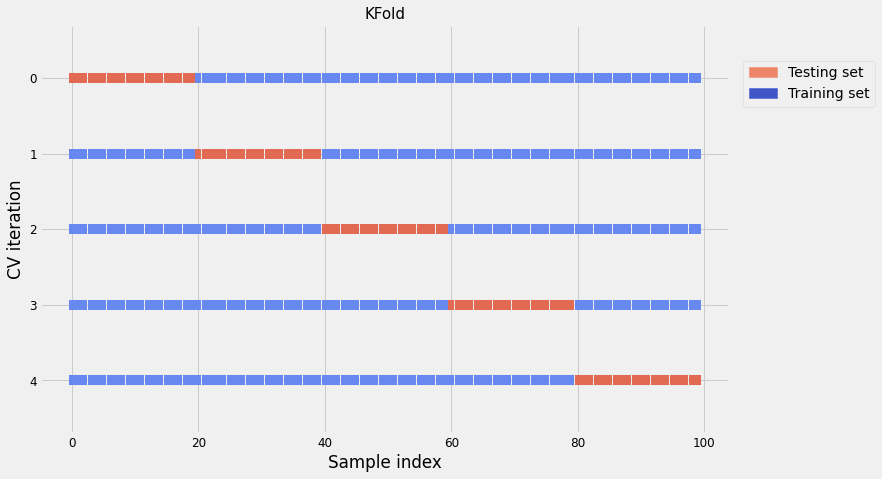

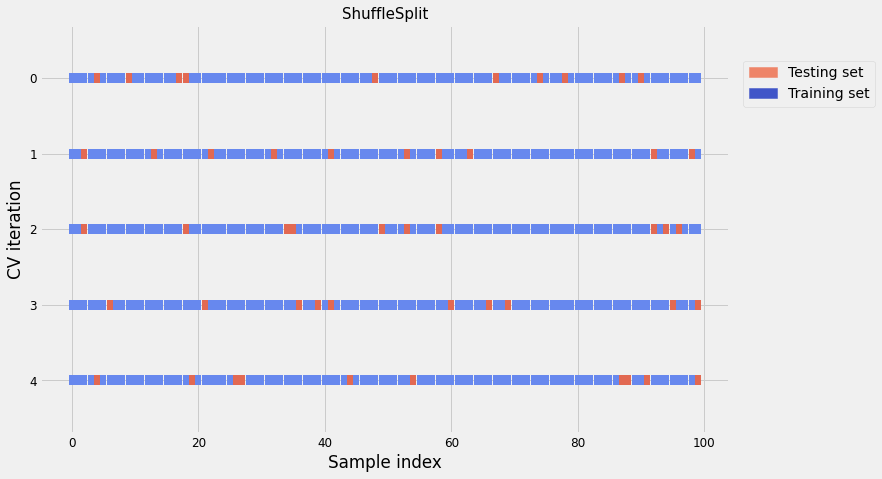

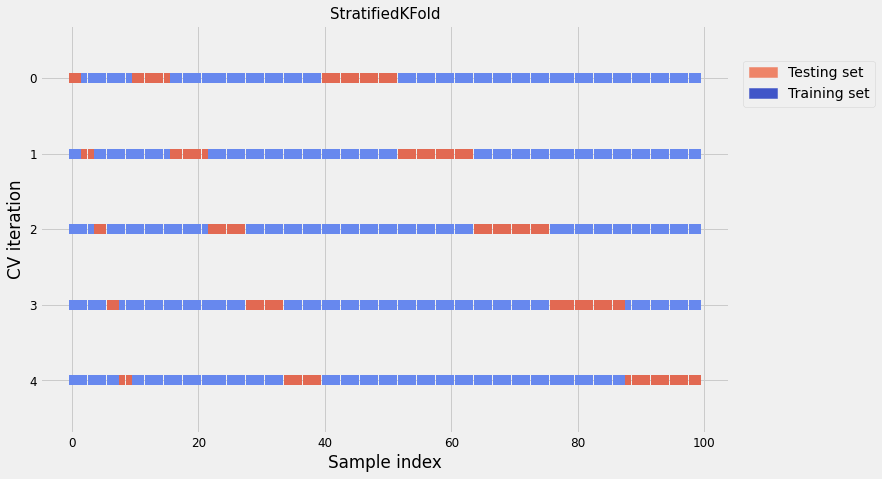

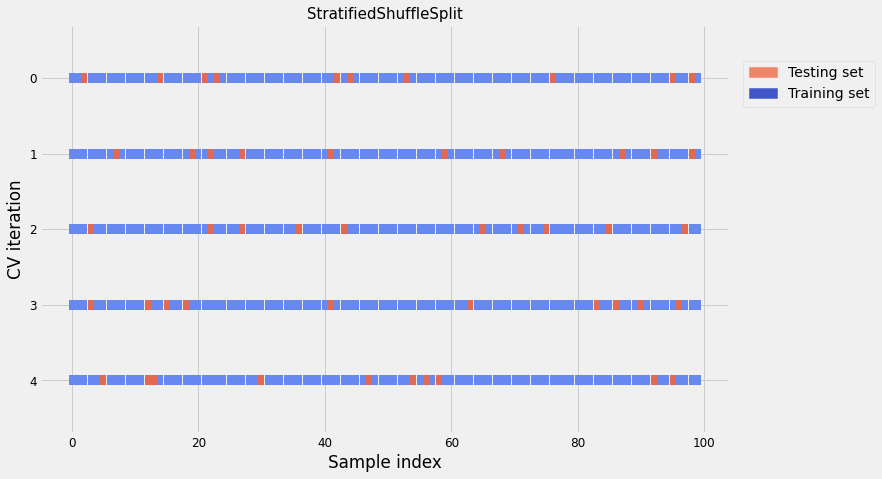

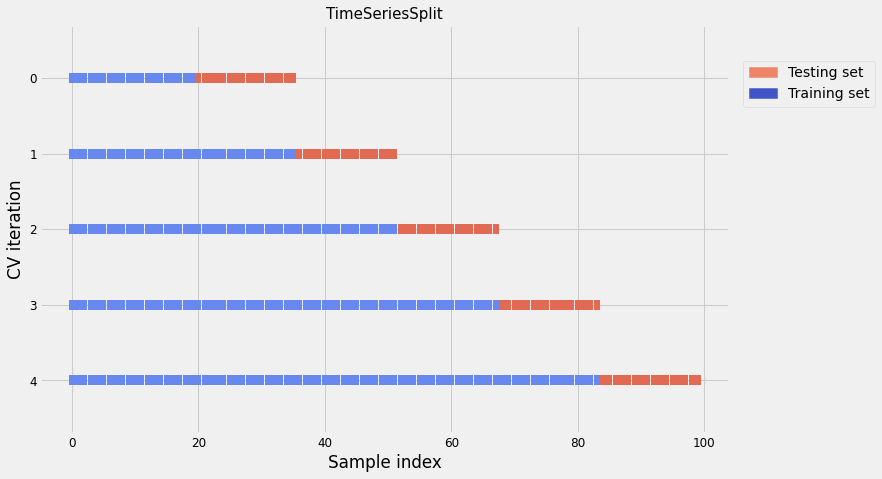

In [43]:
## Using TimeSeriesSplit from sklearn library
## Citation : https://www.kaggle.com/tomwarrens/timeseriessplit-how-to-use-it

pd.options.display.max_columns = 30
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
warnings.filterwarnings('ignore')

cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit]
n_points = 100
n_splits = 5
X = np.random.randn(100, 10)
percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Function modified from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize = (11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels)
    
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    

for i, cv in enumerate(cvs):
    this_cv = cv(n_splits=n_splits)
    plot_cv_indices(this_cv, n_splits, X, y, date_col=None)

This code illustrates the use of the TimeSeriesSplit function from the SkLearn library for cross-validating time series data. It imports necessary libraries and sets up some configuration for plotting. The plot_cv_indices function takes a cross-validation object, a number of splits, input features (`X`), the target variable (`y`), and an optional date column. The function creates a plot showing the indices of the training and testing sets for each CV split.

The code then iterates over different types of cross-validation strategies (`KFold`, `ShuffleSplit`, `StratifiedKFold`, `StratifiedShuffleSplit`, and `TimeSeriesSplit`) and uses the `plot_cv_indices` function to generate plots for each CV strategy. The plots visualize the indices of the training and testing sets for each CV iteration. Overall, this code illustrates how to use TimeSeriesSplit and other cross-validation strategies. During cross-validation, it helps visualize how the data is split into training and testing sets.

In [75]:
## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
pyplot.figure(1)
fig = plt.figure(figsize=(12, 12))

index = 1
for train_index, test_index in time_series_splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
    
# 	pyplot.subplot(310 + index)
# 	pyplot.plot(train)
# 	pyplot.plot([None for i in train] + [x for x in test])
#     # pyplot.title(''.format())
# 	index += 1
# pyplot.show()

Observations: 39
Training Observations: 20
Testing Observations: 19
Observations: 58
Training Observations: 39
Testing Observations: 19
Observations: 77
Training Observations: 58
Testing Observations: 19
Observations: 96
Training Observations: 77
Testing Observations: 19


<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

To perform a time series cross-validation, the code uses the TimeSeriesSplit function from the Sklearn library. It creates an instance of TimeSeriesSplit with 4 splits. Once the model is created, it assigns the time series data to the variable `X`. 

The code then iterates over the splits generated by the TimeSeriesSplit. The splits separate the data into training and testing sets using the indices provided by the splits. Next, it prints the number of observations, training observations, and testing observations for each split. Based on the commented-out code below the print statements, it appears that the original code may have also included plotting functionality for visualizing the training and testing sets.  Overall, this code demonstrates how to use the TimeSeriesSplit function to split a time series dataset into training and testing sets in a cross-validation The fashion industry.

The 1223rd

Different pairs of time series can be trained and tested.

In [34]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=5)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

Using the Sklearn library's TimeSeriesSplit function, the code performs a time series cross-validation. It initializes an instance of TimeSeriesSplit with 5 splits. After the splits are generated, it iterates over each instance of the split. For each split, it separates the data into a training set (`train`) and a testing set (`test`) using the indices provided by the split.  The `train` and `test` sets for each split are stored in the `train_list` and `test_list` dictionaries, respectively, with the index of the split as the key.  The index is incremented after each iteration, allowing the code to store the training and testing sets for each split in separate dictionary entries.  Overall, this code demonstrates how to use To perform time series cross-validation, use TimeSeriesSplit to split a time series dataset into multiple training and testing sets. Each split's training and testing sets are stored in dictionaries for further analysis and modeling.

In [85]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()


    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())


    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')


    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')


    
    

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

A function called backtest_model performs a backtest of a SARIMA model on the training and testing data. 

The function creates a SARIMA model with an order of (1,1,1) and a seasonal order of (2,2,0,12). The model is fitted to the training data using the `fit` method. The SARIMA model then generates forecasts for both training and testing periods. The forecasts for the training period are stored in the `forecasts_train` variable, and the forecasts for the testing period are stored in the `forecasts_test` variable. Matplotlib's function uses subplots to create a figure with two subplots. In the first subplot (`ax1`), the forecasts for the training period and the actual training data are plotted. The second subplot (`ax2`) displays the forecasts for the testing period and the actual testing data. Actual training and testing data are converted to pandas DataFrames. As part of plotting the forecasts, DataFrames are used. These plots include titles for each subplot, indicating whether the data is training or testing. The legend is added to both subplots to distinguish the forecasts from the actual data. The function finishes by adjusting the layout of the subplots for improved readability.  Overall, this function performs the backtesting of a SARIMA model by generating forecasts for Training and testing periods, along with visualizing the results.

Set 1 of the backtest

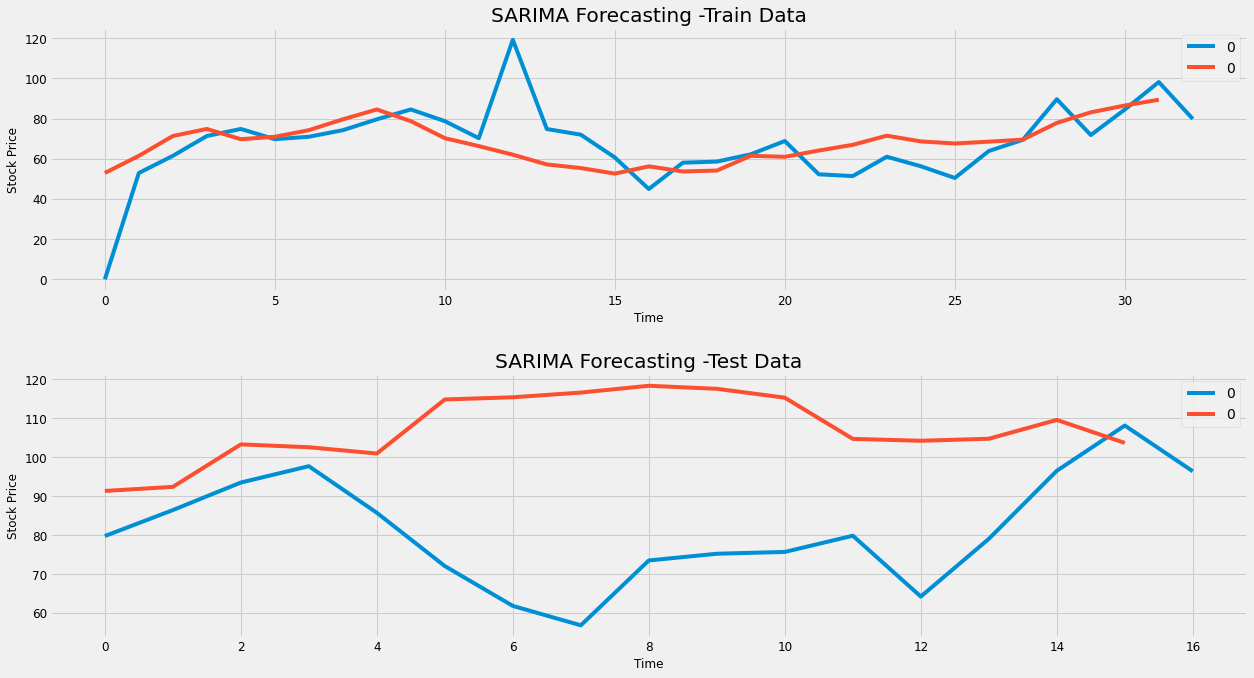

In [86]:
## Backtest Set-1
backtest_model(train_list[2],test_list[2])

On the first set of training and testing data, the backtest_model function is called. 

It takes the training data from `train_list[2]` and the testing data from `test_list[2]` as input. With SARIMA, the data is fitted to the training model, forecasts are generated for both training and testing periods, and they are visualized along with the actual data. This code evaluates the performance of the SARIMA model specifically based on the specific training and testing data in the first backtest set.

Set 2 of the backtest


In [87]:
## Backtest Set-3
backtest_model(train_list[4],test_list[4])

This code calls the `backtest_model` function to perform a backtest on the third set of training and testing data. The training data comes from train_list[4] and the testing data comes from test_list[4]. It fits a SARIMA model to the training data, generates forecasts for both the training and testing periods, and visualizes the forecasts alongside the actual data.

By passing the specific training and testing data from the third backtest set to the `backtest_model` function, this code specifically evaluates the performance of the SARIMA model on that particular set of data.

Set 3 of the backtest

In [88]:
## Backtest Set-4
backtest_model(train_list[5],test_list[5])

This code calls the `backtest_model` function to perform a backtest on the fourth set of training and testing data. It takes the training data from train_list[5] and the testing data from test_list[5]. It fits a SARIMA model to the training data, generates forecasts for both the training and testing periods, and visualizes the forecasts alongside the actual data.

By passing the specific training and testing data from the fourth backtest set to the `backtest_model` function, this code specifically evaluates the performance of the SARIMA model on that particular set of data.

By using backtesting we can validate our model on multiple train-test splits. The red line indicates the training set and the blue line indicates the test set.

Seasonal ARIMA forecasting

In [ ]:
model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()
forecasts_train = results.predict(start='2012-01-31',end='2016-09-30')
forecasts_test = results.predict(start='2016-10-31',end='2019-12-31')

The code fits a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model to the training data. A model with non-seasonal and seasonal components is created using the SARIMAX function from the statsmodels library. The model is then fitted to the training data using the fit method. Forecasts are then generated using the predict method. Forecasts_train stores the predicted values for the training period, which started on January 31, 2012, and ended on September 30, 2016. The `forecasts_test` variable stores the predicted values for the testing period, starting from October 31, 2016, and ending on December 31, 2019.

By calling the predict method with appropriate start and end dates, the code generates forecasts for both the training and testing periods based on the fitted SARIMA model. Forecasts can be used to evaluate the model's performance and compare them with actual results.

In [28]:
##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

Using this code, you can calculate and print various results metrics to evaluate a model's performance. The function takes three parameters: `test_series`, which represents the actual values of the target variable; `forecast_series`, which represents the predicted values of the target variable; and `model_name`, which is a string specifying the name of the model.

Inside the function, the result metrics are computed using specific functions from the scikit-learn library. This function calculates the R2 score, which measures the proportion of the variance in the target variable that can be explained by the independent variables. The mean squared error is computed by the mean_squared_error function, which represents the average squared difference between the actual and predicted values. The `mean_absolute_error` function calculates the mean absolute error, which is the average absolute difference between the actual and predicted values. Afterward, the model name is displayed along with the result metrics. To assess the accuracy and predictive power of the model, the R2 score, mean squared error, and mean absolute error are reported.

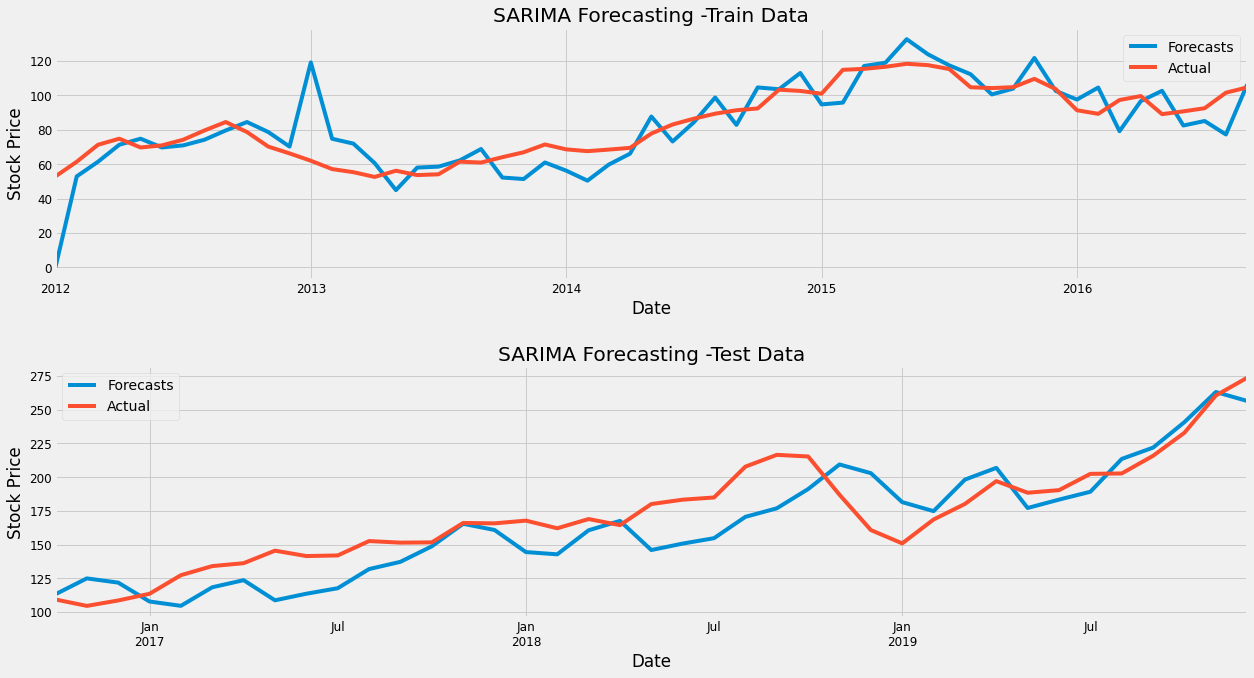

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

A figure with two subplots is generated using the `subplots` function from the `matplotlib.pyplot` library. This figure has a size of 18x10 units. The first subplot (ax1) plots the predicted values of a time series (forecasts_train). As well as a subplot showing the actual values of the time series (trains), a subplot called "Actual" displays the actual values of the time series. "SARIMA Forecasting - Train Data" is the title of the subplot. This subplot represents the predicted values of another time series with the label "Forecasts", while the other subplot represents predicted values of another time series with the label "Forecasts". In the same subplot, the actual values of these time series are also plotted with the label "Actual.". "SARIMA Forecasting - Test Data" is the title of the subplot. The y-axis label is set to "Stock Price". Both subplots have legends to distinguish between predicted and actual values. The `tight_layout` function improves the spacing and alignment of subplots within the figure.

In [ ]:
print(result_metrics(train,forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(test,forecasts_test,'SARIMA-Test Data'))


Result Metrics for SARIMA-Train Data
R2 Score :  0.491
Mean Squared Error :  199.567
Mean Absolute Error :  9.797
Mean Absolute Percentage Error 13.39
Accuracy(100-MAPE) of Model is 87.0%
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.704
Mean Squared Error :  441.121
Mean Absolute Error :  17.557
Mean Absolute Percentage Error 10.65
Accuracy(100-MAPE) of Model is 89.0%
None


This code calculates and prints the result metrics for the SARIMA model's training and testing data.

For the training data, it calls the `result_metrics` function with the actual values of the training data (`train`), the predicted values of the training data (`forecasts_train`), and a model name of 'SARIMA-Train Data'. The `result_metrics` function calculates and prints the R2 score, mean squared error (MSE), and mean absolute error (MAE) between the actual and predicted values of the training data.

For the testing data, it calls the `result_metrics` function with the actual values of the testing data (`test`), the predicted values of the testing data (`forecasts_test`), and a model name of 'SARIMA-Test Data'. The `result_metrics` function calculates and prints the R2 score, MSE, and MAE between the actual and predicted values of the testing data. These metrics are calculated and printed by the function.

Training and test accuracy of the model are similar, indicating that the model performs well on both types of data. This suggests that the model is generalizing well and is not overfitting or underfitting the data.

Good model fit results in accurate predictions on both the training and test sets because it is able to capture the underlying patterns and relationships in the data. Based on this, the model has learned the important features and can make reliable predictions. Comparative accuracy between the training and test sets and good model fit indicate that the model is performing well and does not exhibit issues such as overfitting (where it memorizes the training data too well and performs poorly on new data) or underfitting (where it fails to capture patterns in the data and performs poorly on both training and test data).

In [ ]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Adj Close   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(2, 2, 0, 12)   Log Likelihood                -120.570
Date:                            Fri, 21 Aug 2020   AIC                            251.139
Time:                                    18:17:51   BIC                            258.468
Sample:                                01-31-2012   HQIC                           253.569
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7677      0.439      1.748      0.081      -0.093       1.629
ma.L1         -0.5014      0.592   

This code prints the summary of the SARIMAX model results. The results object represents the fitted SARIMAX model. By calling the `summary()` method on the `results` object, the code generates and prints a summary report that provides various statistical information and diagnostics about the model.  The summary includes important details such as model coefficients, standard errors, p-values, confidence intervals, information criteria (such as AIC and BIC), and diagnostic tests (such as the Ljung-Box test for residual autocorrelation).  The summary report provides a comprehensive overview of the SARIMAX Analyzing the model's performance can help identify any potential issues or shortcomings and assess the quality of the model fit.

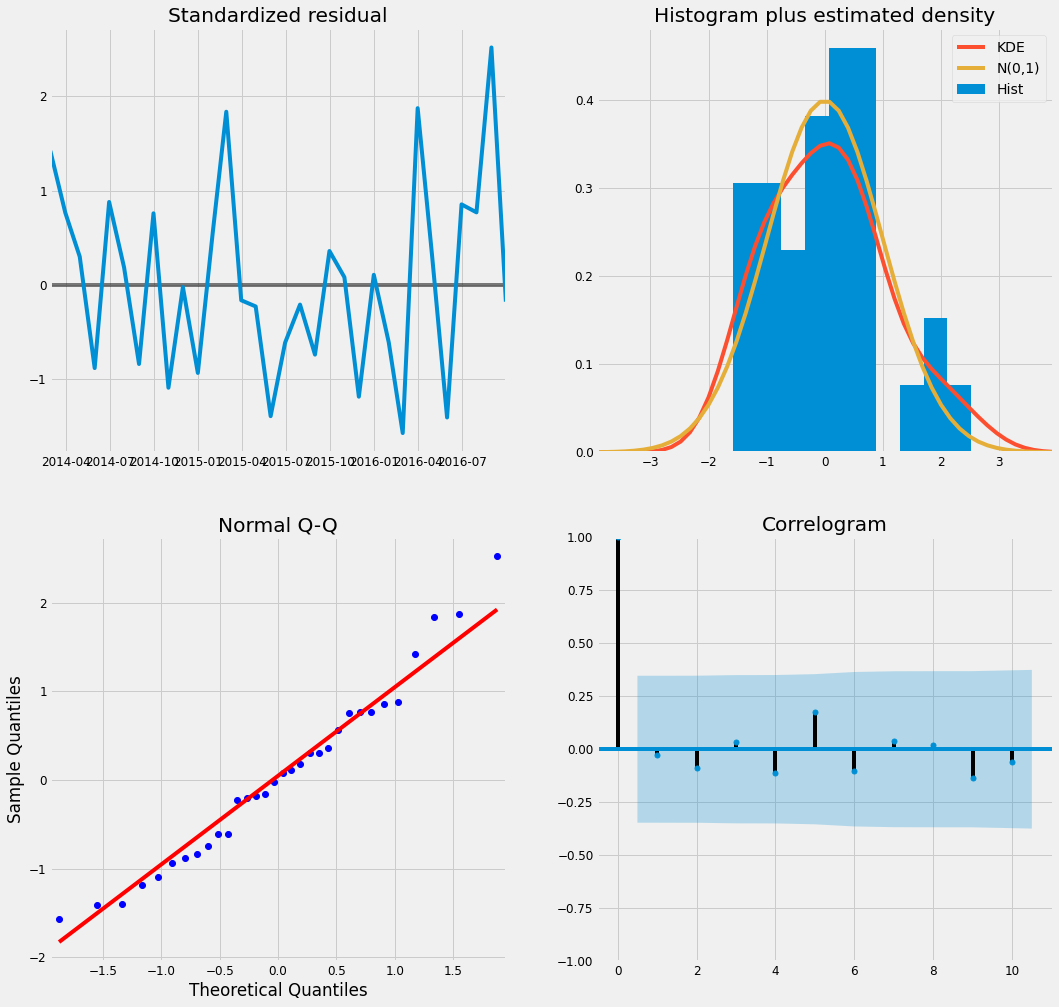

In [ ]:
##Checking Model Diagnotics on Training Data
results.plot_diagnostics(figsize=(16, 16))
plt.show()

Using the training data, this code generates diagnostic plots to evaluate the model's performance. The plots provide insights into the residuals of the model, which represent the differences between the actual values and the predicted values. Among the diagnostic plots are: Histogram of residuals showing the distribution of the differences between actual and predicted values. This is a smoothed version of the histogram that provides a visual representation of residual distributions. A normal Q-Q plot compares the residual quantiles with the quantiles of a standard normal distribution. Deviations from the straight line indicate deviations from normality. Correlograms, or autocorrelation plots, display the correlation between residuals at different latencies. This helps detect any residual patterns or serial correlations. After removing the effects of shorter lags, the partial autocorrelation plot shows the partial correlation between residuals at different lags. This helps identify the order of the autoregressive component of the model. We can assess the assumptions of the model by looking at these diagnostic plots. Model improvements may be suggested by deviations from these assumptions.

Based on the analysis of the residuals:  - The residual plot indicates that the residuals exhibit a stationary behavior, as no significant trends or patterns are observed. - The distribution of the training data residuals follows a nearly normal distribution, suggesting that the model captures the underlying patterns in the data effectively. - The QQ plot shows that the residuals align closely with the expected diagonal line for a normal distribution, indicating that the assumption of According to the correlogram, the residuals at different lags show no significant correlation, implying that the model adequately captures the temporal dependencies in the data. Overall, these findings suggest that the model does well in capturing the stock price dynamics and adequately represents patterns and fluctuations in the data.

Data from the residual analysis test

In [ ]:
residuals_test = test-forecasts_test

Using this code, the residuals of the test data are calculated by subtracting the forecasted values (forecasts_test) from the actual values (test). Based on the model, residuals represent the difference between observed data and predicted values.

No handles with labels found to put in legend.


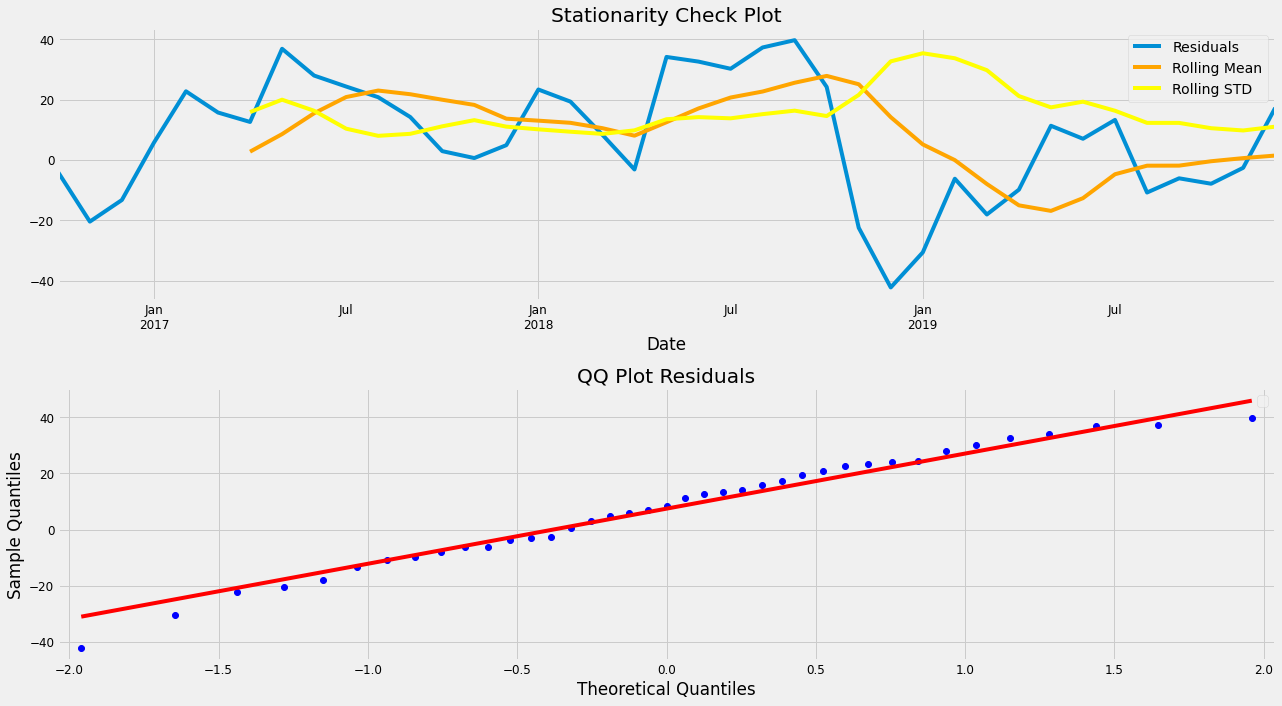

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))


residuals_test.plot(label='Residuals',ax=ax1,title='Stationarity Check Plot')
residuals_test.rolling(7).mean().plot(label='Rolling Mean',c='orange',ax=ax1)
residuals_test.rolling(7).std().plot(label='Rolling STD',c='yellow',ax=ax1)

qq_plot = qq(residuals_test,line='s',ax=ax2)
ax2.set_title('QQ Plot Residuals')
ax1.legend()
ax2.legend()
plt.tight_layout(pad=1)


Two subplots are created by this code. 

The first subplot (ax1) plots the residuals of the test data (residuals_test) and overlays the rolling mean and rolling standard deviation. The residuals are visually inspected for stationarity. The rolling mean and rolling standard deviation help identify any trends or patterns in the residuals over time. A QQ plot of the residuals is created in the second subplot (ax2). QQ plots are used to compare residual distributions with theoretical normal distributions. It helps assess whether the residuals follow a normal distribution or deviate from it. Labels are added to the plotted lines, and the layout has been adjusted.

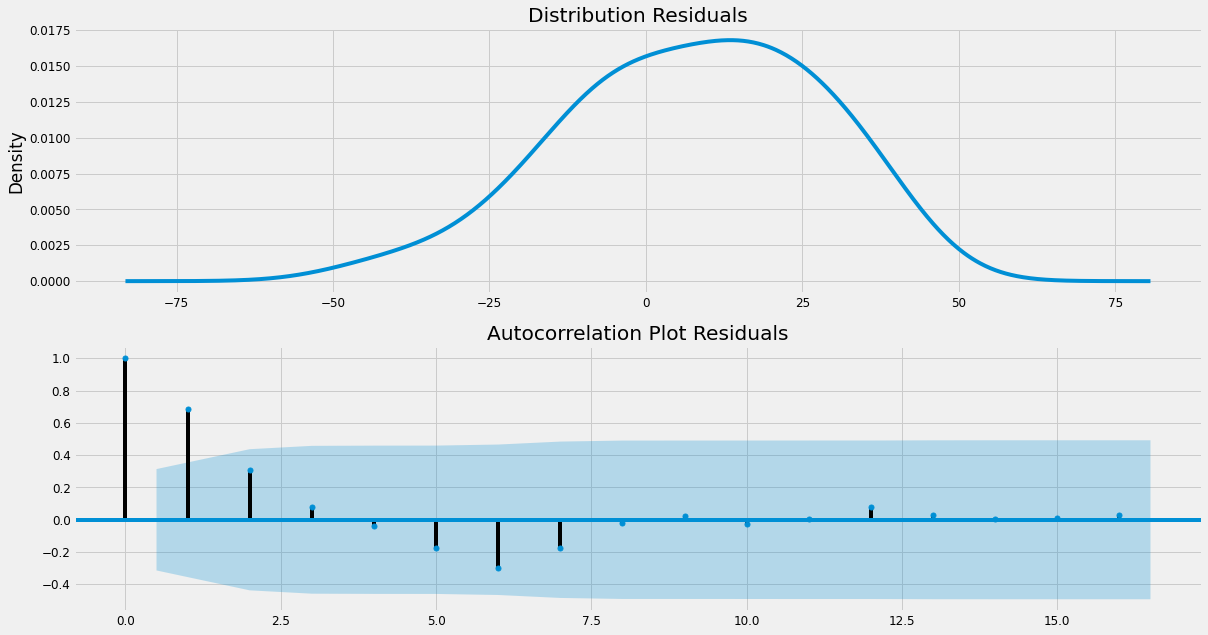

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

residuals_test.plot(kind='kde',ax=ax1,title='Distribution Residuals')

acf = plot_acf(residuals_test,ax=ax2,title='Autocorrelation Plot Residuals')

This code creates a figure with two subplots. The first plot shows the kernel density estimate (KDE) of residuals_test. The KDE provides an estimate of the probability density function of the residuals, giving an insight into their distribution. The second subplot (ax2) shows the residuals_test autocorrelation function (ACF). The ACF measures the correlation between the residuals at different lags, providing information about any remaining patterns or dependencies in the residuals. Subplot titles indicate the type of plot.

In [ ]:
residuals_test.describe()

count    39.000000
mean      7.434401
std      19.899868
min     -42.220201
25%      -6.142017
50%       8.339802
75%      23.041383
max      39.683684
dtype: float64

This code computes descriptive statistics of the residuals_test variable and presents them in a tabular format. Various statistical measures are provided by the describe() function, including count, mean, standard deviation, minimum, and maximum. It gives an overview of the distribution and characteristics of the residuals_test. It displays information such as the number of data points, the average value, the spread of the data, and the range of values. It is possible to understand the residuals' central tendency, variability, and shape using this summary statistics.

In [ ]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

Using the scikit-learn library, the TimeSeriesSplit function splits the data into multiple train-test sets to do cross-validation. In the train_list and test_list dictionaries, the train and test sets will be stored for each split. The time_series_splits object is created using the TimeSeriesSplit function with the specified number of splits (4 in this case). The X variable represents the values of the time series data. The for loop iterates over each value. With the split method of the time_series_splits object, the train and test sets are extracted from the X values based on the obtained indexes. The train and test sets are then stored in the train_list and test_list dictionaries, respectively, with an index indicating the split number. Lastly, the index is incremented to keep track of the split number for the next iteration.

In [ ]:
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780718
Freq: M, Name: Adj Close, Length: 96, dtype: float64

It does not provide specific information about the code that initializes or assigns a value to a variable named "modelling_series.". This makes it impossible to determine the exact purpose or meaning of the "modelling_series" variable without the preceding code.

In [ ]:
train_list[1]

array([52.90729845, 61.42438085, 71.29244814, 74.8101506 , 69.70804455,
       70.92884829, 74.20094186, 79.59537835, 84.49984068, 78.69092705,
       70.22318162, 66.26465915, 62.00116614, 57.15554147, 55.34968775,
       52.58421514, 56.195146  , 53.66024345, 54.116633  , 61.4545905 ])

The code `train_list[1]` retrieves the value stored in the `train_list` dictionary at index 1. Access to a specific element within the dictionary allows you to retrieve and use the corresponding data. Without knowing the specific values stored in `train_list` or the context in which it was defined, it is not possible to determine the exact meaning or purpose of `train_list[1]`.

In [ ]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')

    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

Backtest_model takes train and test datasets as inputs. A SARIMAX model is fitted to the `train` dataset with an order of (1, 1, 1) and a seasonal order of (2, 2, 0, 12). The model is then used to generate forecasts for both the `train` and `test` datasets. These forecasts are displayed in two subplots, one for each dataset. For plotting purposes, it converts the train and test datasets into dataframes. On the first subplot, forecast values are plotted along with actual values for the train dataset. The forecasts for the `test` dataset are plotted along with the actual values on the second subplot. Both subplots show the stock price, and the legend indicates the actual and forecasted values. The subplots are adjusted to ensure proper spacing and alignment. The backtest_model function visualizes the SARIMA forecasting results for both train and test datasets, making it easy to compare actual and predicted values.

0
0     0.000000
1    52.907298
2    61.424381
3    71.292448
4    74.810151
5    69.708045
6    70.928848
7    74.200942
8    79.595378
9    84.499841
10   78.690927
11   70.223182
12  119.171975
13   74.776792
14   71.957645
15   60.626242
16   44.931055
17   58.026352
18   58.568385
19   62.208289
20   68.811285

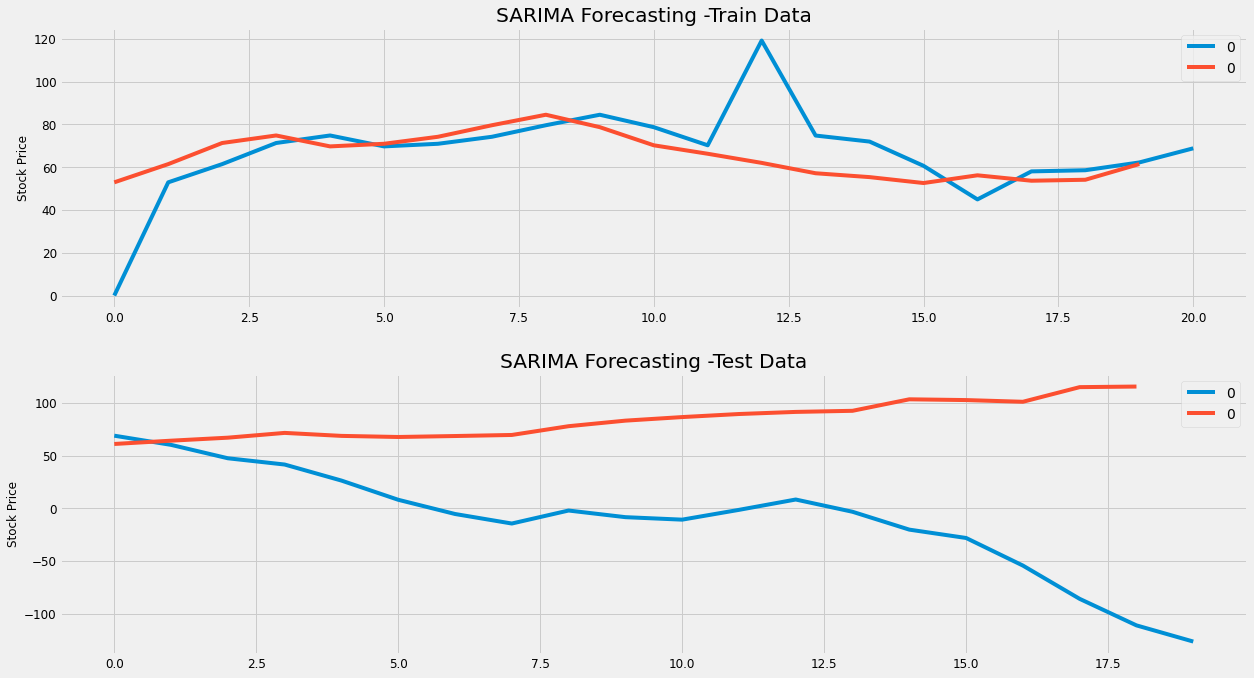

In [ ]:
## Backtest Set-1
backtest_model(train_list[1],test_list[1])

The code calls the backtest_model function and passes the training and testing data from the first backtest set (`train_list[1]` and `test_list[1]`) as arguments. A SARIMAX model is fitted to the training data and forecasts are generated for both training and testing. In two subplots, the forecasting results are plotted, including the actual and forecasted values. In the first subplot, the forecasting results for the training data are shown, and in the second subplot, the forecasting results for the testing data are shown. Plots compare the actual and predicted values for the first backtest set.

In [ ]:
backtest_model(train_list[2],test_list[2])

0
0     0.000000
1    52.907825
2    61.424923
3    71.293026
4    74.810667
5    69.708389
6    70.929159
7    74.201265
8    79.595753
9    84.500262
10   78.691242
11   70.223395
12  119.174540
13   74.775887
14   71.955367
15   60.622715
16   44.927229
17   58.024509
18   58.566461
19   62.206236
20   68.809325
21   52.234603
22   51.365022
23   60.983115
24   56.238428
25   50.412172
26   59.286401
27   65.863271
28   87.778894
29   73.948967
30   84.900684
31   99.582550
32   84.384524
33  106.136353
34  106.077602
35  116.003935
36   98.795992
37  106.993835
38  123.175768
39  121.378558

The code is calling the `backtest_model` function and passing the training and testing data from the second backtest set (`train_list[2]` and `test_list[2]`) as arguments. The function fits a SARIMAX model to the training data and generates forecasts. The forecasting results are then plotted in two subplots, including the actual values and the forecasted values. On the first subplot are the forecasting results for training data, and on the second subplot are the forecasting results for testing data. Plotting the actual and predicted values for the second set of backtests provides a visual comparison.

0
0     0.000000
1    52.908078
2    61.425135
3    71.293207
4    74.810764
5    69.708351
6    70.929056
7    74.201106
8    79.595535
9    84.499949
10   78.690721
11   70.222630
12  119.173526
13   74.775687
14   71.955526
15   60.623423
16   44.928351
17   58.025233
18   58.567255
19   62.207150
20   68.810411
21   52.236341
22   51.366828
23   60.984789
24   56.242130
25   50.416587
26   59.483908
27   65.770064
28   87.345094
29   72.967517
30   84.181412
31   98.585102
32   82.762341
33  104.566347
34  103.574889
35  113.069053
36   94.825144
37   95.610054
38  116.877067
39  118.784809
40  132.723843
41  123.751436
42  117.598514
43  112.738522
44  100.739884
45  104.459942
46  122.041314
47  103.087062
48   97.767480
49  104.526952
50   79.642055
51   96.969780
52  102.904420
53   82.867508
54   85.283066
55   77.306419
56  106.179998
57  112.600235
58  119.927259

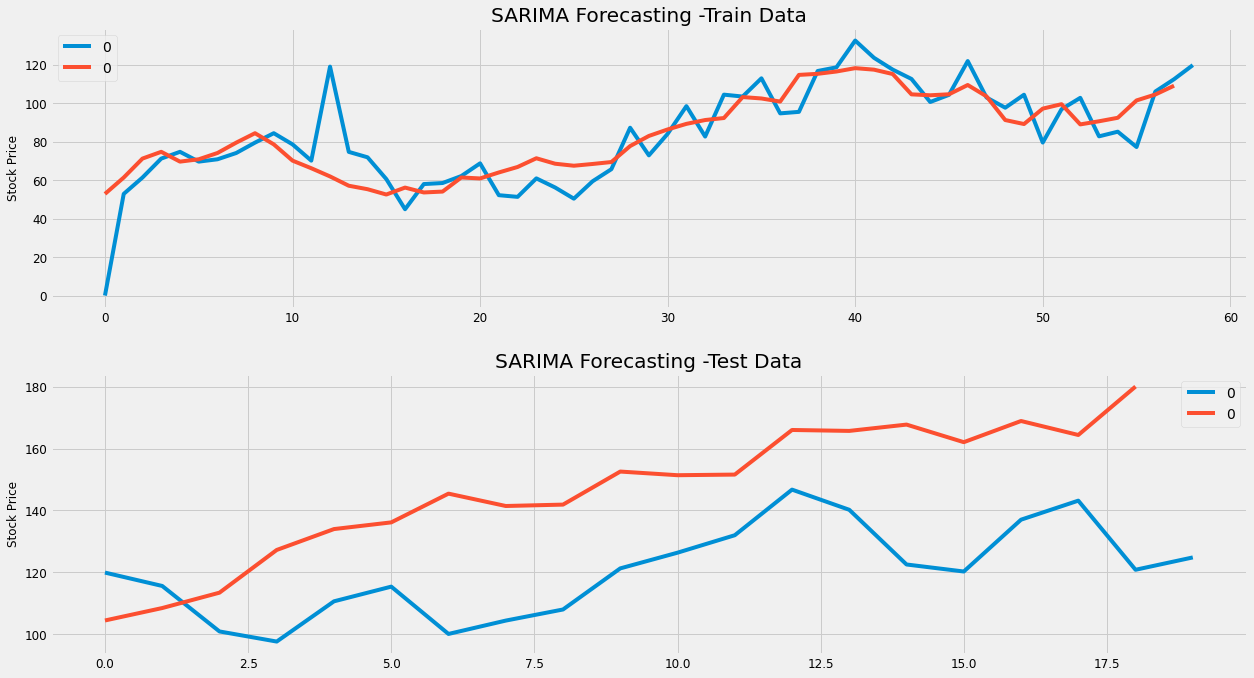

In [ ]:
backtest_model(train_list[3],test_list[3])

It invokes the backtest_model function and passes the training and testing data obtained from the third backtest set (`train_list[3]` and `test_list[3]`) as arguments. Forecasts for both training and testing data are generated by fitting a SARIMAX model to the training data. The forecasting results are then plotted in two subplots, including the actual values and the forecasted values. On the first subplot, the forecasting results for the training data are visualized, while on the second subplot, the forecasting results for the testing data are displayed. A visual comparison can be made between the actual and predicted values for the third backtest set using these plots.

In [ ]:
forecasts_train

0
0  68.811285

Using a SARIMAX model, the code generates forecasts for the training data. Forecasts_train represents the predicted values for the training data. The forecasts are obtained by applying the trained SARIMAX model to the training dataset, starting from the beginning of the dataset and continuing until the end. Forecasts are based on historical information and learned parameters in the model.

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

Matplotlib is used to generate a figure with two subplots (ax1 and ax2). 18x10 is the size of the figure. 

Ax1 plots the forecasts for the training data (`forecasts_train`) with the label 'Forecasts' and the actual values for the training data (`train`) with the label 'Actual'. Its title is set to 'SARIMA Forecasting - Train Data', and its y-axis label is 'Stock Price'.

In the second subplot (ax2), it plots the forecasts for the test data (`forecasts_test`) with the label 'Forecasts' and the actual values for the test data (`test`) with the label 'Actual'. The title of this subplot is set to 'SARIMA Forecasting - Test Data', and the y-axis label is also set to 'Stock Price'. Legends indicate which line corresponds to forecasts and which line corresponds to actuals. To improve readability, the plt.tight_layout() function is used.

Verdict on Seasonal ARIMA The model's residuals are close to zero, indicating that it captures data patterns on average. However, the presence of some bias suggests that there might be room for improvement in the model's accuracy. Given that stock price prediction is a challenging task, the seasonal ARIMA model performs fairly well. In the past, it has demonstrated the ability to capture important patterns and forecast stock prices reasonably.

The Prophet Model for Time Series on Facebook

In [ ]:
##Getting Data Ready for the Model
prophet_data = monthly_data
prophet_data['Date'] = prophet_data.index
prophet_data

Adj Close  Year      Month  dayofweek  quarter       Date
Date                                                                  
2012-01-31   52.907298  2012    January    Tuesday        1 2012-01-31
2012-02-29   61.424381  2012   February  Wednesday        1 2012-02-29
2012-03-31   71.292448  2012      March   Saturday        1 2012-03-31
2012-04-30   74.810151  2012      April     Monday        2 2012-04-30
2012-05-31   69.708045  2012        May   Thursday        2 2012-05-31
...                ...   ...        ...        ...      ...        ...
2019-08-31  202.738817  2019     August   Saturday        3 2019-08-31
2019-09-30  215.853332  2019  September     Monday        3 2019-09-30
2019-10-31  232.974974  2019    October   Thursday        4 2019-10-31
2019-11-30  260.569057  2019   November   Saturday        4 2019-11-30
2019-12-31  273.780718  2019   December    Tuesday        4 2019-12-31

[96 rows x 6 columns]

By creating a DataFrame called prophet_data, this code prepares the data for the Prophet model. This new DataFrame contains the original data. Furthermore, a new column called 'Date' is added to prophet_data, which contains the index values.

In [ ]:
prophet_data.drop(labels=['Year','Month'],axis=1,inplace=True)

By using the drop() function, the 'Year' and 'Month' columns are removed from the prophet_data DataFrame. The labels parameter specifies the columns to drop, and the axis parameter indicates whether the columns should be dropped. The `inplace` parameter is set to True, which means that the changes are made directly to the dataframe without creating a new one. The 'Year' and 'Month' columns are removed from the `prophet_data` DataFrame.

In [ ]:
prophet_data = prophet_data.reindex(columns=['Date','Adj Close'])

The following code reorders the columns in the `prophet_data` DataFrame. By using the reindex() function, it specifies the order in which columns should appear. Using this parameter, the DataFrame should be reindexed with the ['Date', 'Adj Close'] columns in the specified order. 

The `prophet_data` DataFrame will have its columns rearranged, with the 'Date' column appearing first, followed by the 'Adj Close' column. If there are any remaining columns, they will remain in their original order.

In [ ]:
##Prophet needs two columns in form of ds and y being Date and series
prophet_data.rename(columns={'Date':'ds',
                   'Adj Close':'y'},inplace=True)

To comply with Prophet, a forecasting library developed by Facebook, this code renames columns in the Prophet DataFrame. 

Column names can be modified using the rename() function. It specifies a dictionary with the keys being the current column names and the values being the new column names. 'Date' is renamed to 'ds', and 'Adj Close' to 'y'. 

This renaming operation transforms the DataFrame columns into Prophet-compatible formats. In the 'ds' column, we represent the date or time values, and in the 'y' column, we represent the series or target variable.

In [ ]:
prophet_data

ds           y
Date                             
2012-01-31 2012-01-31   52.907298
2012-02-29 2012-02-29   61.424381
2012-03-31 2012-03-31   71.292448
2012-04-30 2012-04-30   74.810151
2012-05-31 2012-05-31   69.708045
...               ...         ...
2019-08-31 2019-08-31  202.738817
2019-09-30 2019-09-30  215.853332
2019-10-31 2019-10-31  232.974974
2019-11-30 2019-11-30  260.569057
2019-12-31 2019-12-31  273.780718

[96 rows x 2 columns]

Code snippet `prophet_data` refers to a DataFrame named `prophet_data`. It is an intermediate or final representation of data that is being prepared or processed for analysis or modeling using the Facebook Prophet forecasting library.

The specific content and structure of `prophet_data` will depend on the previous steps in the code or the data preprocessing steps performed prior to this point. Typically, it contains a column for each date or time value (often labeled 'ds') and the series data to be forecasted (often labeled 'y') relevant to time series analysis. Using the prophet_data DataFrame as input, the library can analyze the time series data, identify patterns, and generate forecasts or predictions based on the parameters and configurations specified for the models.

In [ ]:
##Spliting Train Test 
prophet_train,prophet_test = split(prophet_data,train_size=0.6,shuffle=False)
print('Training Data Size :',len(prophet_train))
print('Testing Data Size :',len(prophet_test))

Training Data Size : 57
Testing Data Size : 39


This code splits the `prophet_data` DataFrame into training and testing datasets. The `prophet_train` and `prophet_test` variables will hold the respective subsets of the data. Train-to-test ratio is 0.6 (60% for training and 40% for testing). In this case, we use the split function. The `shuffle` parameter is set to `False`, which means that the order of the data will be maintained during the split. Following this, the code prints the size of the training and testing datasets by using the len function. By doing this, it is possible to gain a better understanding of the distribution of data between the training and testing sets.

In [ ]:
##Model Fitting Basic Model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Prophet library is used to fit a basic model. 

First, a Prophet model instance is created with the `yearly_seasonality` parameter set to `True`. This indicates that the model should consider yearly seasonality patterns in the data. The Prophet model is then fitted to the Prophet_train dataset using the `fit` method. This step trains the model on the provided training data, allowing it to learn patterns and relationships within the time series. The model is then adjusted to best capture the training data's trends and patterns. In order to make predictions, the model learns seasonality, trends, and other patterns from the historical data.

In [ ]:
future= prophet_model.make_future_dataframe(periods=39,freq='M')

The code is used to create a dataframe called `future` that represents the future dates for which we want to make predictions using the Prophet model. Using Prophet's make_future_dataframe function. It takes two parameters: `periods` and `freq`. This specifies the number of future time periods to generate dates for. In this case, it is set to 39, indicating that we want to generate 39 future dates. It specifies the frequency of the time periods. In this case, it is set to 'M', indicating monthly frequency. Based on the specified number of periods and frequency, the function generates a dataframe with a column named 'ds' that contains future dates. We will use this dataframe to make predictions for the future.

In [ ]:
future

ds
0  2012-01-31
1  2012-02-29
2  2012-03-31
3  2012-04-30
4  2012-05-31
..        ...
91 2019-08-31
92 2019-09-30
93 2019-10-31
94 2019-11-30
95 2019-12-31

[96 rows x 1 columns]

The code creates a dataframe called `future` that represents the future dates for which we want to make predictions using the Prophet model. Each date is represented by a column named 'ds'. It includes the historical dates from the training data as well as the future dates for which we want to make predictions. This future dataframe gives Prophet a set of dates to predict. These future dates are used to forecast the values of the target variable. Using the prediction method of the Prophet model, we can predict the dates based on the dataframe. As a result, we can analyze and forecast the values of the target variable for the specified future periods.

A basic model for forecasting prophets

In [ ]:
##Predicting Using Prophet
forecast=prophet_model.predict(future)
forecast.index = prophet_data['y'].index


The code uses the Prophet model to generate predictions for the future dates specified in the `future` dataframe. By using the future dataframe, we call the Prophet model's predict method. The trained model is used to generate forecasts for the target variable based on the learned trends and patterns. A dataframe containing a forecast variable containing a variety of columns, including predictions, uncertainty intervals, and trend components, is used to store the forecasts. 

We align the predictions with the original dataset by setting the index of the forecast dataframe to match the index of prophecy_data['y']. As a result, the predicted values can be easily compared and analyzed with the actual values.

In [ ]:
prophet_df = pd.concat([forecast['yhat'],prophet_data['y']],axis=1,ignore_index=True)
prophet_df.columns = ['Predicted','Actual']
prophet_df

Predicted      Actual
Date                              
2012-01-31   51.013627   52.907298
2012-02-29   54.127696   61.424381
2012-03-31   62.093561   71.292448
2012-04-30   64.484456   74.810151
2012-05-31   59.239299   69.708045
...                ...         ...
2019-08-31  137.032166  202.738817
2019-09-30  138.633809  215.853332
2019-10-31  141.063501  232.974974
2019-11-30  151.250682  260.569057
2019-12-31  147.015192  273.780718

[96 rows x 2 columns]

This code creates a prophet_df dataframe by concatenating two columns: forecast['yhat'] and prophet_data['y']. 

The forecast['yhat'] column contains the predicted values generated by the Prophet model. It represents the forecasted values. 

The `prophet_data['y']` column contains the actual values of the target variable from the original dataset.

By concatenating these two columns together along the horizontal axis (`axis=1`), we create a dataframe that contains both the predicted values and the actual values.

The resulting dataframe `prophet_df` has two columns: "Predicted" and "Actual", representing the predicted values and the actual values of the target variable, respectively. Prophet_df inherits the index from prophet_data, making it easy to compare and analyze predicted and actual values.

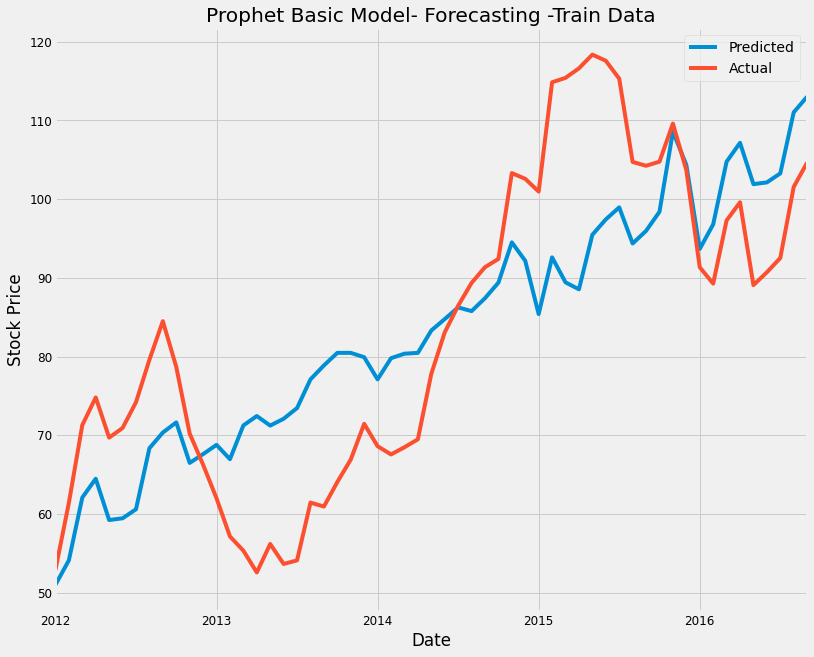

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][:57].plot(label='Predicted')
prophet_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

In this code, a figure of 12x10 inches is generated. It then plots the values in the "Predicted" column of the `prophet_df` dataframe, specifically the first 57 values. The plot is labeled as "Predicted". The plot then displays the values from the "Actual" column of the prophet_df dataframe. The plot is labeled as "Actual". Its title is "Prophet Basic Model - Forecasting - Train Data". This provides a descriptive title for the visualization. The y-axis label is set as "Stock Price", which provides a clear indication of the data represented on the y-axis. A legend is added to distinguish between "Predicted" and "Actual" data. The viewer can therefore identify which line corresponds to the predicted values and which line corresponds to the actual values easily. Using the Prophet basic model, this code generates a line plot that compares the actual and predicted stock prices for the training data.

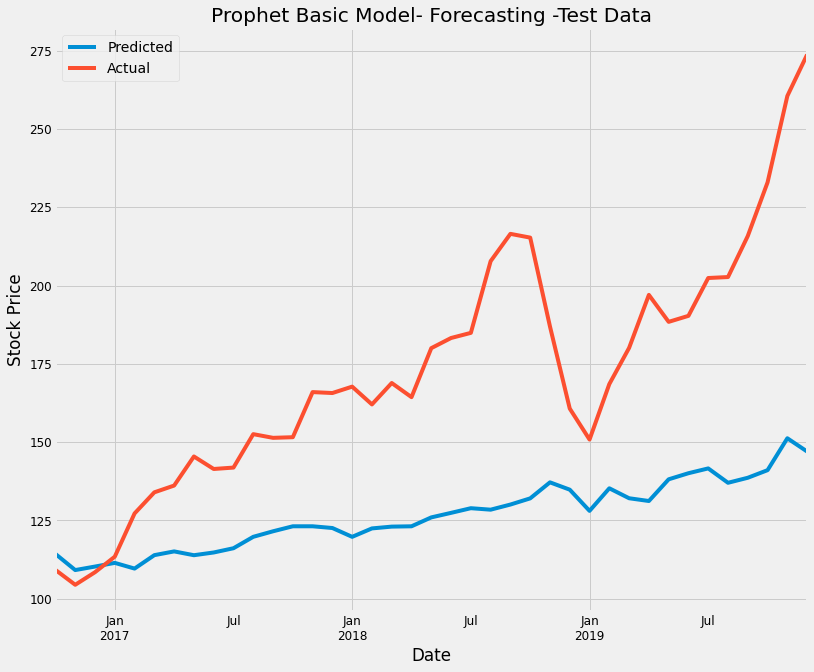

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][57:].plot(label='Predicted')
prophet_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

A 12x10-inch figure is generated by this code. Starting at the 58th value, it plots the values from the "Predicted" column of the prophet_df dataframe, creating a line plot. The plot is labeled as "Predicted". From the 58th value onward, it plots values from the "Actual" column. The plot is labeled as "Actual". Its title is "Prophet Basic Model - Forecasting - Test Data". This gives a descriptive title for the visualization, indicating the data being plotted is the test data. The y-axis label is set to "Stock Price", indicating the type of data represented on the y-axis. An additional legend is added to the plot to distinguish between "Predicted" and "Actual" data. It is easy to identify which line corresponds to the predicted values and which line corresponds to the actual values this way. Using the Prophet basic model, this code generates a line plot that compares the predicted and actual stock prices for the test data.

In [ ]:
print(result_metrics(prophet_df['Actual'][:57],prophet_df['Predicted'][:57],'Prophet Basic-Train Data'))

Result Metrics for Prophet Basic-Train Data
R2 Score :  0.598
Mean Squared Error :  157.648
Mean Absolute Error :  10.794
Mean Absolute Percentage Error 13.785
Accuracy(100-MAPE) of Model is 86.0%
None


Using the training data, this code calculates and prints the Prophet basic model metrics. It calls the `result_metrics` function, passing in the actual values from the actual column of the prophet_df dataframe and the predicted values from the predicted column. The model name is specified as "Prophet Basic-Train Data". Evaluation metrics are calculated using the result_metrics function. Metrics such as R-squared, mean squared error, and mean absolute error are typically included. These metrics provide insights into how well the model fits the training data and how accurate its predictions are compared to the actual values.

The code provides a quantitative assessment of the Prophet basic model's performance on the training data by printing the result metrics. By comparing the model with other models or future predictions, you can evaluate the model's ability to capture the underlying patterns and trends in the training data.

In [ ]:
print(result_metrics(prophet_df['Actual'][57:],prophet_df['Predicted'][57:],'Prophet Basic-Test Data'))

Result Metrics for Prophet Basic-Test Data
R2 Score :  -0.973
Mean Squared Error :  2936.426
Mean Absolute Error :  46.175
Mean Absolute Percentage Error 24.535
Accuracy(100-MAPE) of Model is 75.0%
None


Using the test data, this code calculates and prints the Prophet basic model metrics. Using the "Actual" column of the prophet_df dataframe for the data points starting from index 57, it calls the "result_metrics" function, passing in the predicted values from the "Predicted" column. The model name is specified as "Prophet Basic-Test Data". Various evaluation metrics are calculated by the result_metrics function. A model's ability to generalize to unseen data and how accurate its predictions are can be evaluated by these metrics. The code provides a quantitative assessment of Prophet basic model performance on test data by printing the result metrics. A model's ability to forecast future values is assessed by its ability to make accurate predictions on new, unseen data. In the case of multiple test sets, the result metrics can be used to compare the performance of different models.

Train Test Accuracy differences indicate overfitting of the Basic Prophet Model with default parameters.

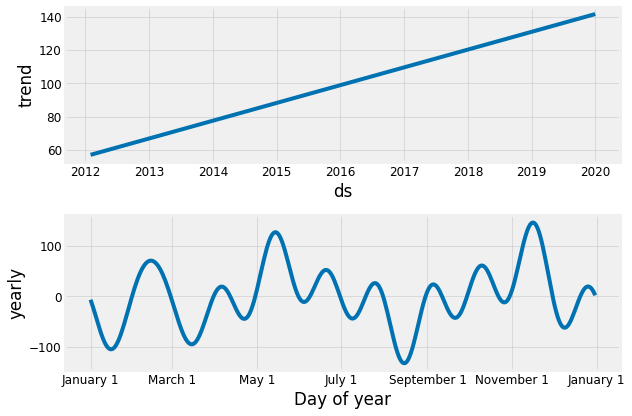

In [ ]:
fig = prophet_model.plot_components(forecast)

Using the Prophet model, the code generates a figure showing the individual components of the forecasted time series. In the data, each component represents a different pattern or trend, such as trends, seasonality, and holidays. Using this figure, it is possible to understand and interpret the underlying patterns in the data more effectively.

In [ ]:
print('Head',prophet_test.head(1))
print('Tail',prophet_test.tail(1))

Head                    ds           y
Date                             
2016-10-31 2016-10-31  109.212791
Tail                    ds           y
Date                             
2019-12-31 2019-12-31  273.780718


The first and last rows of the Prophet test dataset are printed by this code. A glimpse of the actual values used for testing the Prophet model's performance can be seen at the beginning and end of the dataset. "Head" prints the first row, while "Tail" prints the last row.

The seasonal-ARIMA model seems to have captured the model better.


Prophet Model Hyper-Tuning

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.3,0.4],
              'holidays_prior_scale':[0.3,0.4],
              'n_changepoints' : [20,50]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 16


The code explores different combinations of Prophet hyperparameters using a grid search. For the seasonality mode, changepoint prior scale, holidays prior scale, and the number of changepoints, it defines a parameter grid. By passing the grid to the Scikit-Learn library's ParameterGrid function, all possible combinations of parameter values are generated. This variable keeps track of the number of parameter combinations in the grid. Last but not least, the code prints the total number of models that will be evaluated during the grid search.

In [ ]:
df = prophet_data 

It assigns the value of the variable prophet_data to the variable df. The original data is not copied or modified, but rather a new reference is created to it. df and prophet_data will refer to the same underlying data, so any changes made to one variable will be reflected in the other. By completing this assignment, you can use the variable df as a convenient alternative reference to the prophecy data dataset in the following code.

In [ ]:
prophet_train_hyper,prophet_test_hyper = split(prophet_data,train_size=0.7,shuffle=False)

The code splits the `prophet_data` into two datasets: `prophet_train_hyper` and `prophet_test_hyper`. Based on a specified train size of 0.7, approximately 70% of the data will be assigned to `prophet_train_hyper`, while the remaining 30% will be assigned to `prophet_test_hyper`. As the shuffle parameter is set to False, the order of the data will not be randomly shuffled. It is intended to create separate training and testing datasets for the subsequent steps of model training and evaluation.

In [ ]:
prophet_test_hyper.head(5)

ds           y
Date                             
2017-08-31 2017-08-31  152.563906
2017-09-30 2017-09-30  151.386422
2017-10-31 2017-10-31  151.586949
2017-11-30 2017-11-30  165.996497
2017-12-31 2017-12-31  165.699087

The following code retrieves the first five rows from the prophet_test_hyper dataset. In this case, the function returns a subset that includes the first five rows of the data. By using this, you can quickly examine the structure and contents of the prophet_test_hyper dataset and gain a basic understanding of its format and contents. This subset displays the top five rows of the dataset, providing a glimpse at the data's variables, values, and labels.

In [ ]:
len(prophet_test_hyper)

29

The code calculates and returns the length of the prophet_test_hyper dataset. In the dataset, len() determines the number of rows or observations. It calculates the total number of rows in the dataset by applying length() to prophet_test_hyper. Using this information, you can assess data volume, perform calculations, or set loop iteration limits for the prophet_test_hyper dataset.

In [ ]:
strt='2017-08-31'
end='2019-12-31'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for i in grid:
    test = pd.DataFrame()
    print(i)
    
    train_model =Prophet(changepoint_prior_scale = i['changepoint_prior_scale'],
                         holidays_prior_scale = i['holidays_prior_scale'],
                         n_changepoints = i['n_changepoints'],
                         seasonality_mode = i['seasonality_mode'],
                         weekly_seasonality=False,
                         daily_seasonality = False,
                         yearly_seasonality = True,
                         )
    
    train_model.fit(prophet_train_hyper)
    train_forecast = train_model.make_future_dataframe(periods=29, freq='M',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>=strt) & (df['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)---------------------------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.859205296067646
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.319035627345643
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.949163539500603
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.612467608177305
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changep

In this code, a grid search is performed over a parameter grid to find the Prophet model's optimal set of parameters. It iterates through each parameter combination in the grid and evaluates the model's performance based on the mean absolute percentage error (MAPE). A new instance of the Prophet model is created for every iteration. The model is fitted on the `prophet_train_hyper` dataset, which represents the training data used for hyperparameter tuning. The model (train_model) and future forecasts (train_forecast) are then generated. The predictions for this period (`test`) are selected based on the specified start (`strt`) and end (`end`) dates. MAPE is calculated as the difference between actual and predicted values. The calculated MAPE is then stored in the `MAPE` variable. Each time the model is iterated, the MAPE value and the parameters (`p`) are appended to the `model_parameters` DataFrame. This DataFrame will hold the evaluation results for all parameter combinations. The code identifies the best parameter combination for Prophet by iterating through the parameter grid and evaluating it with MAPE.

In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head(3)

MAPE                                         Parameters
0  12.319036  {'changepoint_prior_scale': 0.4, 'holidays_pri...
1  12.319036  {'changepoint_prior_scale': 0.4, 'holidays_pri...
2  12.592062  {'changepoint_prior_scale': 0.4, 'holidays_pri...

A DataFrame is sorted based on its MAPE (Mean Absolute Percentage Error) values in ascending order. The rows of the DataFrame are rearranged to reflect the sorted order. 

Next, the sorted DataFrame is assigned to the parameters variable. By sorting the DataFrame, the code identifies the parameter combinations that result in the lowest MAPE values, indicating better performance of the Prophet model. The top three rows of the Parameters DataFrame are displayed via the head(3) method. Based on the evaluation results, these are the parameter combinations with the lowest MAPE values.

In [ ]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.4,
 'holidays_prior_scale': 0.4,
 'n_changepoints': 50,
 'seasonality_mode': 'additive'}

It accesses the value of the 'Parameters' column in the `parameters` DataFrame at index 0. It retrieves the parameter combination associated with the first row of the DataFrame, which has the lowest MAPE value.

By accessing `parameters['Parameters'][0]`, we can obtain the specific parameter values that correspond to the best-performing model according to the MAPE evaluation. Forecasting models can be further refined based on this information by identifying the optimal parameter settings.

Problem with Prophet is its Overfits quite easily for out dataset. As a result, we try some other hyperparameters with Hit and Trial.

In [ ]:
prophet_tuned_model = Prophet(
                      growth='linear',
                      changepoint_prior_scale= 0.001,
                      holidays_prior_scale = 0.02,
                      seasonality_prior_scale=0.3,
                      
                      seasonality_mode = 'additive',
                      weekly_seasonality=False,
                      daily_seasonality = False,
                      yearly_seasonality = True,
                      changepoints=['2017-07-31']
                      )
prophet_tuned_model.add_country_holidays(country_name='US')
prophet_tuned_model.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
prophet_tuned_model.add_seasonality(name='yearly', period=365, fourier_order=20)
prophet_tuned_model.add_country_holidays(country_name='US')
prophet_tuned_model.fit(prophet_train_hyper)

The following code creates a new instance of the Prophet model called prophet_tuned_model. The model is configured to use a linear growth trend and includes various hyperparameters such as `changepoint_prior_scale`, `holidays_prior_scale`, and `seasonality_prior_scale` that control the flexibility and influence of different components in the model.

As part of the model, the additive seasonality mode is set and a Fourier order of 20 is used to simulate yearly seasonality. Additionally, a monthly seasonality with a period of 30.5 days and a Fourier order of 5 is added to capture shorter-term patterns.

The model is further customized by incorporating country-specific holidays for the United States using `add_country_holidays` and setting changepoints to occur at '2017-07-31'. Adding these features will enhance the model's ability to capture changes in the time series and holiday effects. Lastly, the `prophet_tuned_model` is fitted or trained using the `prophet_train_hyper` dataset, which consists of the training data specifically split for hyperparameter tuning.

In [ ]:
future_hyper= prophet_tuned_model.make_future_dataframe(periods=29,freq='M')

It generates a new dataframe called `future_hyper` that contains the dates for which we want to make predictions using the tuned Prophet model (`prophet_tuned_model`). The `make_future_dataframe` function is used to create a dataframe with future dates based on the specified period and frequency. Here, the period parameter is set to 29, indicating that we want to generate predictions for 29 future dates. The `freq` parameter is set to 'M', indicating that the frequency of the dates in the dataframe is monthly.

By creating this `future_hyper` dataframe, we are preparing the input data for making predictions with the tuned Prophet model beyond the existing data in the training and testing sets.

In [ ]:
future_hyper=prophet_tuned_model.predict(future_hyper)

To make predictions on the future dates contained in the future_hyper dataframe, this code uses the Prophet tuned model (prophet_tuned_model). The `predict` function is called on the `prophet_tuned_model` object and the `future_hyper` dataframe is passed as the argument. It applies the trained model to the future dates and generates predictions. The predictions are stored in a new dataframe called `future_hyper`, which now contains the predicted values for the specified future time points. This code gives us the forecasted values for the future dates. Predictions can be used to analyze and make informed decisions about time series data.

In [ ]:
future_hyper.index = prophet_data['y'].index

It assigns the index of the `prophet_data['y']` series to the index of the `future_hyper` dataframe. 

By setting the index of `future_hyper` to be the same as the index of `prophet_data['y']`, we ensure that the forecasted values in `future_hyper` align with the corresponding dates in the original time series data. As a result, it is easy to compare the predicted values with the original dataset's values.

In [ ]:
prophet_hyper_df = pd.concat([future_hyper['yhat'],prophet_data['y']],axis=1,ignore_index=True)

A new DataFrame called prophet_hyper_df is created by concatenating the 'yhat' column from the future_hyper DataFrame with the 'y' column from the prophet_data DataFrame. 

It will contain two columns: the first column contains the forecasted values ('yhat') generated by the Prophet model, and the second column contains the actual values ('y') from the original time series. 

In this way, it is easier to compare and analyze the Prophet model's performance in predicting time series data by aligning the forecasted and actual values within the same DataFrame.

In [ ]:
prophet_hyper_df.columns = ['Predicted','Actual']
prophet_hyper_df.tail(3)

Predicted      Actual
Date                              
2019-10-31  162.409937  232.974974
2019-11-30  163.999990  260.569057
2019-12-31  165.712779  273.780718

This code renames the columns of the `prophet_hyper_df` DataFrame to 'Predicted' and 'Actual', respectively. In DataFrames, the columns attribute is used to access and modify the column names. When this is the case, the column names are changed to 'Predicted' for the first column, which contains forecasted values, and 'Actual' for the second column, which contains actual values. It returns the last three rows of the DataFrame, giving an overview of the final predicted and actual values.

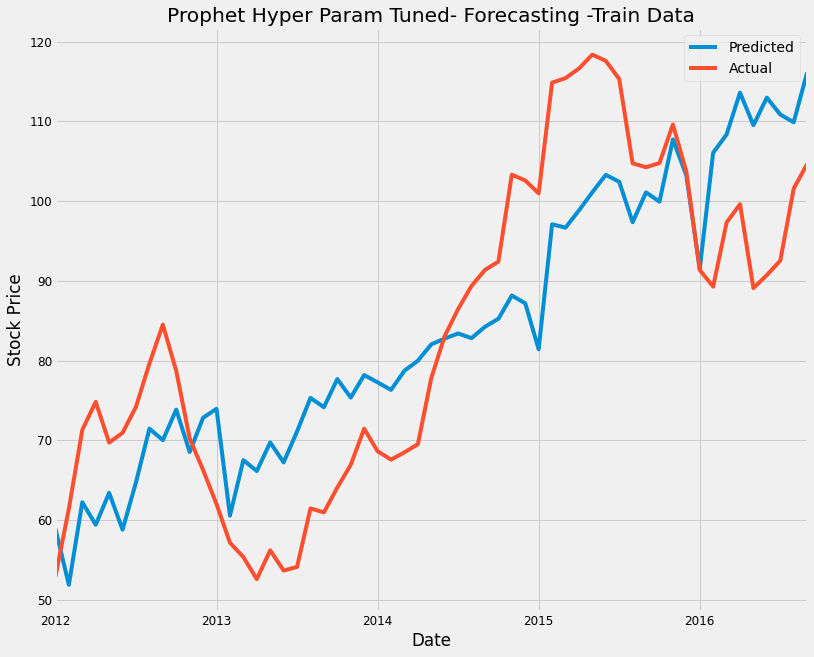

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][:57].plot(label='Predicted')
prophet_hyper_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

In this code, a figure of a specified size is created using plt.figure(figsize=(12,10)).   The `prophet_hyper_df['Predicted'][:57].plot(label='Predicted')` line plots the predicted values from the 'Predicted' column of the `prophet_hyper_df` DataFrame for the first 57 rows.  The `prophet_hyper_df['Actual'][:57].plot(label='Actual')` line plots the actual values from the 'Actual' column of the `prophet_hyper_df` DataFrame for the first 57 rows.  The `plt.title('Prophet Hyper Param Tuned- Forecasting -Train Data')` sets the title of the plot.  The `plt.ylabel('Stock Price')` sets the This plot displays a legend with the labels 'Predicted' and 'Actual' for the y-axis. With this code, a graph comparing the predicted and actual stock price values for the training data is generated using the Prophet hyperparameter-tuned model.

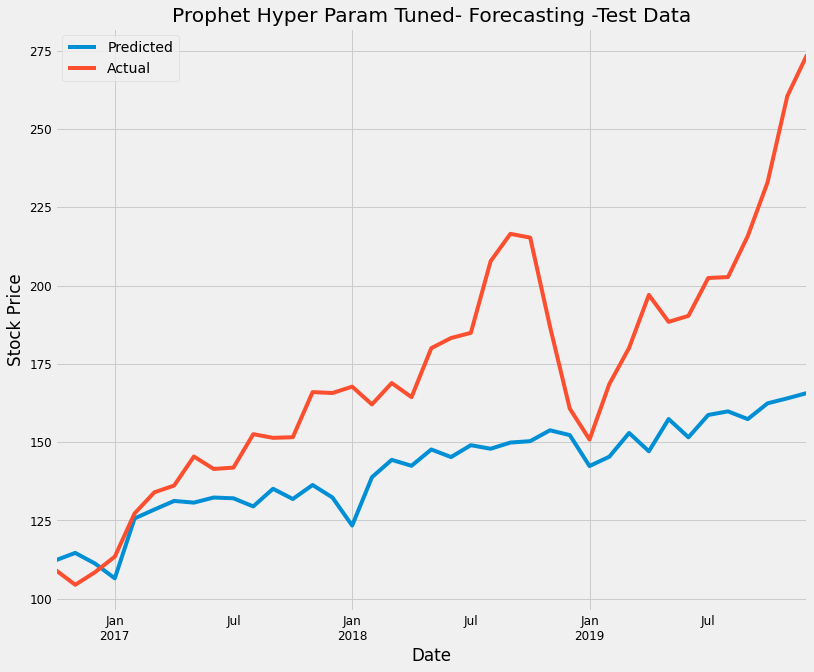

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][57:].plot(label='Predicted')
prophet_hyper_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

The code creates a figure with a size of 12x10 using plt.figure(figsize=(12,10)).   Next, the line `prophet_hyper_df['Predicted'][57:].plot(label='Predicted')` plots the predicted values from the 'Predicted' column of the `prophet_hyper_df` DataFrame, starting from the 58th row onwards.  Similarly, the line `prophet_hyper_df['Actual'][57:].plot(label='Actual')` plots the actual values from the 'Actual' column of the `prophet_hyper_df` DataFrame, starting from the 58th row onwards.  The `plt.title('Prophet Hyper Param Tuned- Forecasting -Test Data')` sets the title of the plot to "Prophet Hyper Param Tuned- Forecasting -Test Data".  The `plt.ylabel('Stock Price')` sets the label for the y-axis as "Stock Price".  Finally, the `plt.legend()` command displays the legend in the plot, which includes the labels "Predicted" and "Actual".  In summary, this code generates a plot that compares the predicted and actual values of the stock price for the test data using the Prophet hyperparameter-tuned model. In this plot, you can see how well the model aligns with actual data and how well it performs.

In [ ]:
result_metrics(prophet_hyper_df['Actual'][:67],prophet_hyper_df['Predicted'][:67],'Hyper-Tuned Prophet Train Data')

Result Metrics for Hyper-Tuned Prophet Train Data
R2 Score :  0.784
Mean Squared Error :  129.543
Mean Absolute Error :  9.986
Mean Absolute Percentage Error 12.076
Accuracy(100-MAPE) of Model is 88.0%


The code `result_metrics(prophet_hyper_df['Actual'][:67],prophet_hyper_df['Predicted'][:67],'Hyper-Tuned Prophet Train Data')` calculates and prints the result metrics for the hyperparameter-tuned Prophet model on the train data.  The function `result_metrics` takes the actual values of the train data, which are stored in the 'Actual' column of the `prophet_hyper_df` DataFrame, and the predicted values of the train data, which are stored in the 'Predicted' column of the same DataFrame, as input. Typical result metrics include R2, mean squared error (MSE), and mean absolute error (MAE). The metrics provide insight into the model's accuracy and performance in predicting stock prices.

In [ ]:
result_metrics(prophet_hyper_df['Actual'][67:],prophet_hyper_df['Predicted'][67:],'Hyper-Tuned Prophet Test Data')

Result Metrics for Hyper-Tuned Prophet Test Data
R2 Score :  -1.31
Mean Squared Error :  2187.789
Mean Absolute Error :  40.501
Mean Absolute Percentage Error 20.338
Accuracy(100-MAPE) of Model is 80.0%


The code `result_metrics(prophet_hyper_df['Actual'][67:],prophet_hyper_df['Predicted'][67:],'Hyper-Tuned Prophet Test Data')` calculates and prints the result metrics for the hyperparameter-tuned Prophet model on the test data.  The function `result_metrics` takes the actual values of the test data, which are stored in the 'Actual' column of the `prophet_hyper_df` DataFrame starting from index 67, and the predicted values of the test data, which are stored in the 'Predicted' column of the same Typically, the result metrics computed and printed include the R2 score, mean squared error (MSE), and mean absolute error (MAE). The metrics provide insight into the model's accuracy and performance in predicting the stock price based on unseen test data.

After hyperparameter tuning, it appears that the tuned Prophet model is not able to capture effectively the seasonality and sudden changes in the time series from the year 2017 onward. - The model shows signs of overfitting, indicating that it may not generalize well to unseen data. - Comparatively, the Seasonal ARIMA model outperforms Prophet in terms of capturing the underlying patterns in the data. However, Prophet is capable of capturing the overall trend of the data. Future projects may benefit from adding additional regressors to Prophet to improve forecasting accuracy.

Project Summary:  Seasonal ARIMA vs Facebook's Prophet  When comparing Seasonal ARIMA with Prophet for our prediction problem, we found: - Prophet is easier to implement, fast, and requires less statistical knowledge compared to Seasonal ARIMA, which involves various tests and processes to generate predictions. - Seasonal ARIMA is better at capturing the seasonality component of time series data. - Both models exhibit robustness in their overall performance. Prophet is better at handling outliers. - Prophet tends to suffer from overfitting issues. In our evaluation, we found that Seasonal ARIMA performed significantly better than Prophet for our prediction problem. We are more confident in Seasonal ARIMA's predictions, since they are supported by mathematical and statistical tests. - The accuracy achieved by Seasonal ARIMA is 89%, while Prophet Out-of-sample accuracy is 80%.

Actionable Insight: Based on the trend shown by both models, AAPL is a buy.

We conclude that Seasonal ARIMA outperforms Facebook's Prophet in predicting AAPL's stock price. Seasonal ARIMA's mathematical and statistical foundations contribute to its superior accuracy and ability to capture seasonality, making it a more reliable choice for stock price forecasts. Nevertheless, Prophet's strengths lie in its ease of implementation and handling of outliers, which can be advantageous in certain scenarios. Our study provides investors with actionable insights. Seasonal ARIMA, which demonstrated an accuracy of 89% on out-of-sample data, recommends AAPL as a buy. By conducting a comprehensive analysis of both models, we gain a better understanding of their strengths and limitations, enabling us to guide investment decisions more effectively. Future research may explore the possibility of incorporating additional regressors to improve forecasting accuracy further by combining the strengths of Seasonal ARIMA and Facebook's Prophet. With the advancement of forecasting techniques, investors will be able to make more accurate predictions and navigate the dynamic market landscape more efficiently.